In [1]:
import src
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats

plt.rcParams.update({
    "font.size": 10,
    "figure.dpi": 100,
})

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
HOME_DIR, BASE_DIR, CODE_DIR, TB_DIR, RMS_DATA_DIR = src.config.config_paths()

# Data processing and visualisation for Runout Testing

## Import datasets

In [4]:
expLabels = [
    'Test 14',
    'Test 15',
    'Test 16',
    'Test 17',
    'Test 18',
    'Test 19',
    'Test 21',
    'Test 22',
    'Test 23',
    'Test 24',
    'Test 25',
    'Test 26',
]

exps = [src.load(label) for label in expLabels]

for exp in exps:
    exp.features.loc[:,['Form error', 'Runout']] = exp.features.loc[:, ['Form error', 'Runout']]*1000

In [5]:
# Add two features for the 350-360 kHz and 900-910 kHz frequency bands
freq = [35, 90]

for i, exp in enumerate(exps):
    f = np.array(exp.ae.fft[1000])
    # avg over 10kHz
    f = f.reshape(-1, 10).mean(axis=1).reshape(f.shape[0],-1)
    f = f.T
    for fr in freq: 
        fNew = np.concatenate(([np.NaN], f[fr]))
        exp.features[f'Freq {fr * 10} kHz'] = fNew

In [6]:
dfs = [exp.features.copy() for exp in exps]

In [7]:
data_names = ['mean_radius', 'peak_radius', 'runout', 'form_error']

m_rad = [exp.nc4.mean_radius for exp in exps]
p_rad = [exp.nc4.peak_radius for exp in exps]
runout = [exp.nc4.runout for exp in exps]
form_error = [exp.nc4.form_error for exp in exps]

data = [m_rad, p_rad, runout, form_error]

In [8]:
# Cut No to transistion to wear out phase
wear_out_idx = [101, 131, 123, 122, 119, 115, 81, 50, 66, 74, 34, 24]

## Test Overviews

In [9]:
info = []
for i, exp in enumerate(exps):
    info.append([i + 1, len(exp.features) - 1, wear_out_idx[i], exp.features['Runout'].iloc[0], exp.features['Runout'].mean(), exp.features['Form error'].iloc[0], exp.features['Form error'].mean()])

df = pd.DataFrame(info, columns=['Test No', 'No Cuts', 'Wear Out Index', 'Initial Runout', 'Average Runout', 'Initial Form Error', 'Average Form Error'])
df.set_index('Test No', inplace=True)
df.style.background_gradient(subset=['No Cuts', 'Wear Out Index'], cmap='RdYlGn', axis=0,) \
        .background_gradient(subset=['Initial Runout', 'Average Runout', 'Initial Form Error', 'Average Form Error'], cmap='RdYlGn_r', axis=0) \
        .format('{:.2f}', subset=['Initial Runout', 'Average Runout', 'Initial Form Error', 'Average Form Error'])

Text(0, 0.5, 'Number of cuts till out of tolerance')

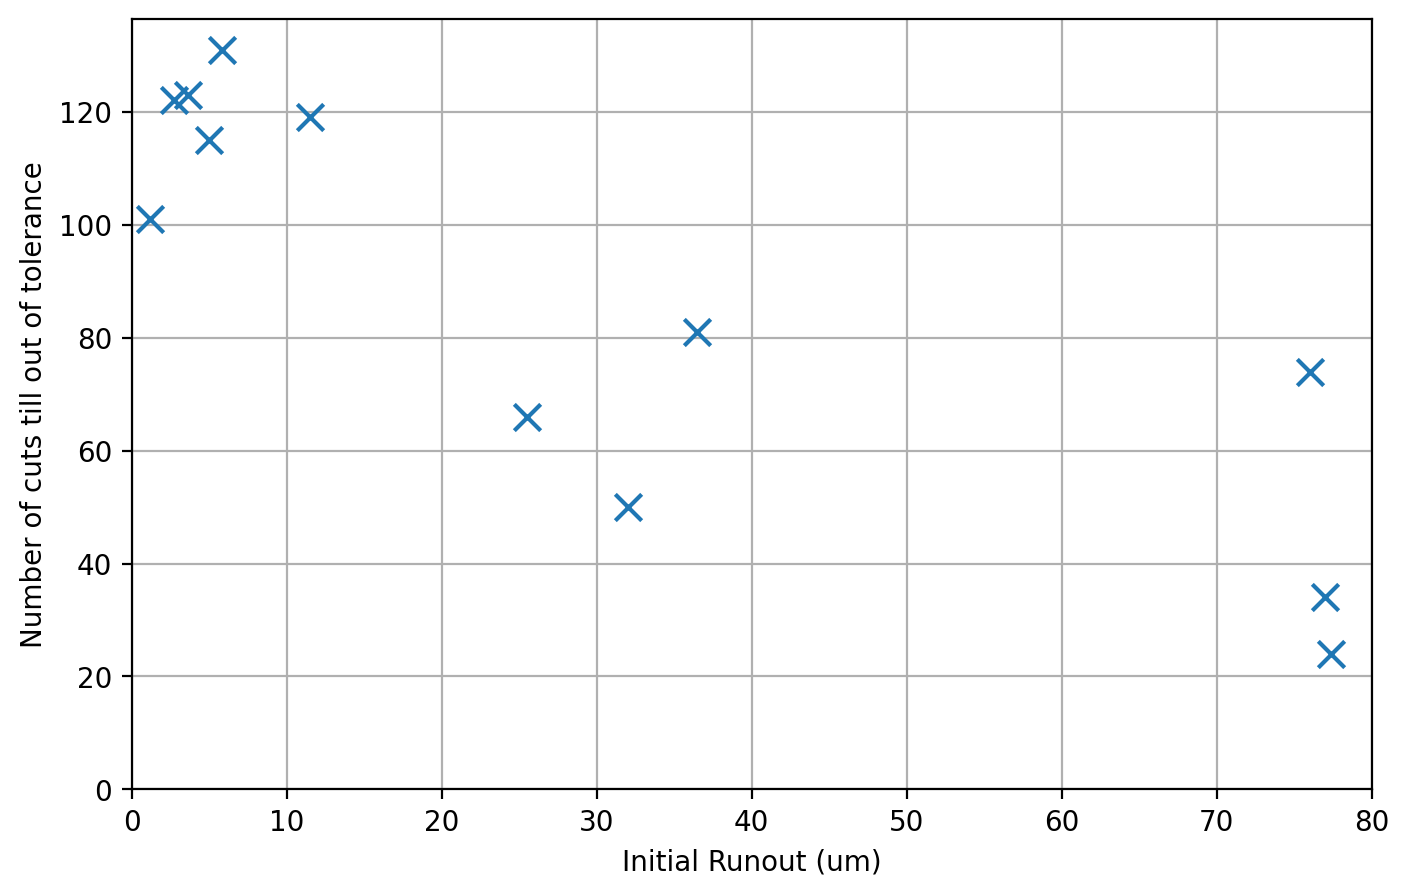

In [10]:
fig, ax = plt.subplots(1, 1, sharey='row', figsize=(8, 5), dpi=200)
ax.scatter(df['Initial Runout'], df['Wear Out Index'], s=90, marker='x')

# p = np.polynomial.Polynomial.fit(df['Initial Runout'], df['No Cuts'], 1)
# x = np.linspace(0, 80, 100)
# y = p(x)
# ax.plot(x, y, 'r--', alpha=0.5)
# grid behind
ax.set_axisbelow(True)
ax.grid()
ax.set_xlim(0, 80)
ax.set_ylim(0, )
ax.set_xlabel('Initial Runout (um)')
ax.set_ylabel('Number of cuts till out of tolerance')

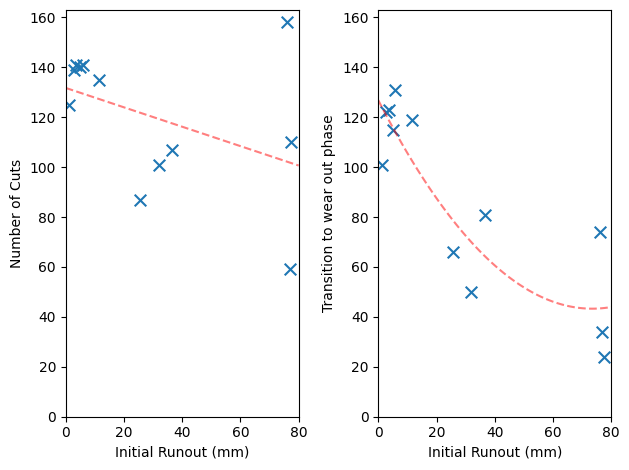

In [11]:
fig, ax = plt.subplots(1, 2, sharey='row')
ax[0].scatter(df['Initial Runout'], df['No Cuts'], s=70, marker='x')

p = np.polynomial.Polynomial.fit(df['Initial Runout'], df['No Cuts'], 1)
x = np.linspace(0, 80, 100)
y = p(x)
ax[0].plot(x, y, 'r--', alpha=0.5)

ax[0].set_xlim(0, 80)
ax[0].set_ylim(0, )
ax[0].set_xlabel('Initial Runout (mm)')
ax[0].set_ylabel('Number of Cuts')

ax[1].scatter(df['Initial Runout'], df['Wear Out Index'], s=70, marker='x')

p = np.polynomial.Polynomial.fit(df['Initial Runout'], df['Wear Out Index'], 2)
x = np.linspace(0, 80, 100)
y = p(x)
ax[1].plot(x, y, 'r--', alpha=0.5)

ax[1].yaxis.set_tick_params(labelbottom=True)
ax[1].set_xlim(0, 80)
ax[1].set_ylim(0, )
ax[1].set_xlabel('Initial Runout (mm)')
ax[1].set_ylabel('Transition to wear out phase')
fig.tight_layout()
plt.show()

Text(0, 0.5, 'Initial Runout (um)')

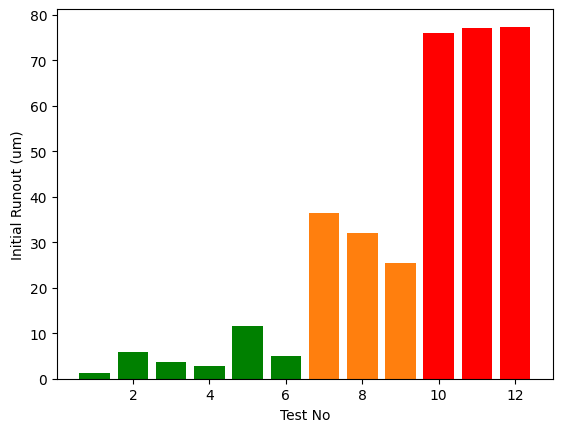

In [12]:
fig, ax = plt.subplots(dpi=100)
ax.bar(df.index[:6], df['Initial Runout'].iloc[:6], label='Initial Runout', color='g')
ax.bar(df.index[6:9], df['Initial Runout'].iloc[6:9], label='Initial Runout', color='C1')
ax.bar(df.index[9:], df['Initial Runout'].iloc[9:], label='Initial Runout', color='r')
ax.set_xlabel('Test No')
ax.set_ylabel('Initial Runout (um)')

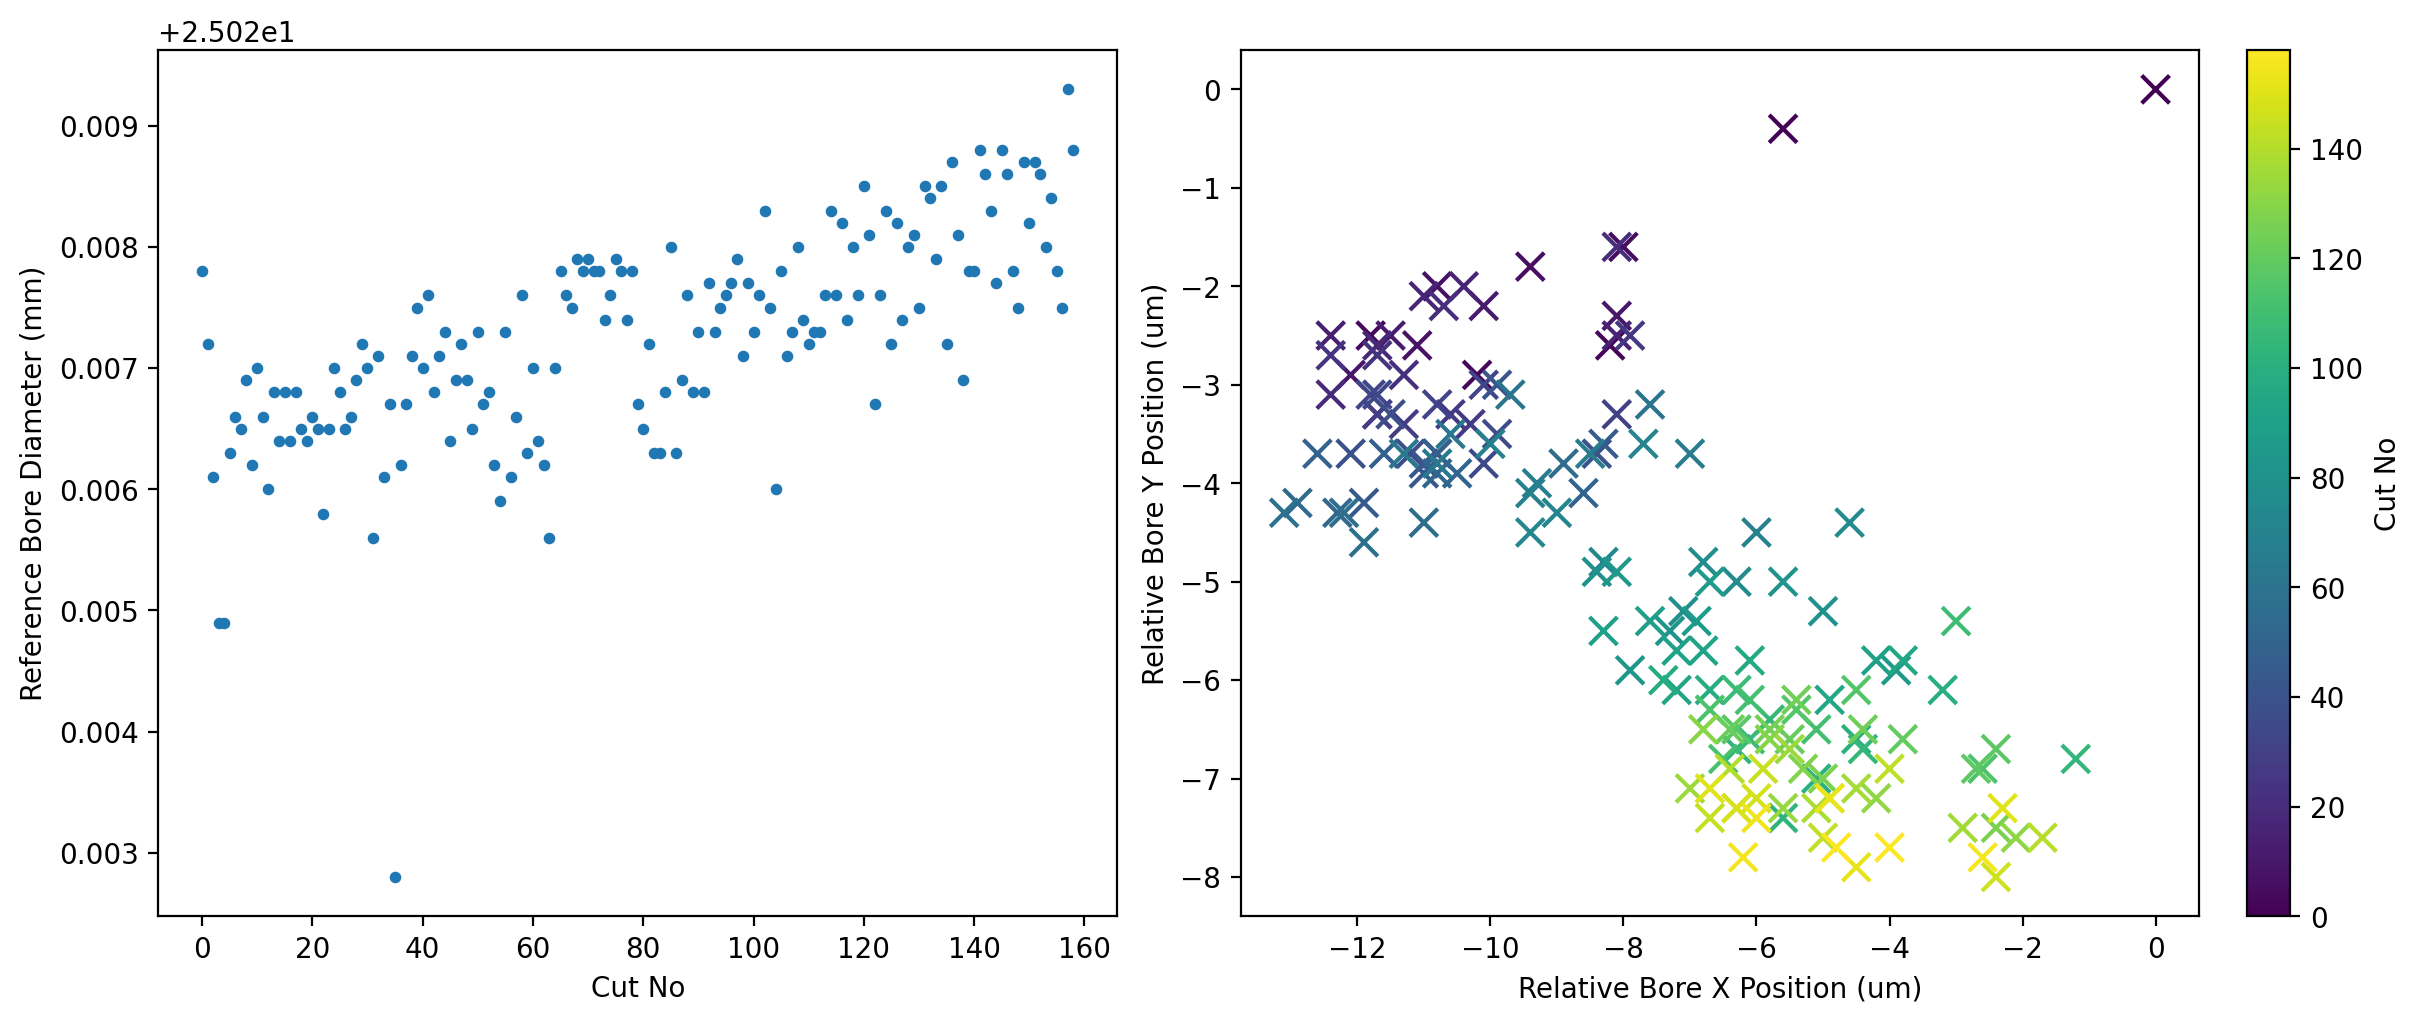

In [13]:
exps[9].probe.plot_probe_refBore()
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.set_dpi(200)

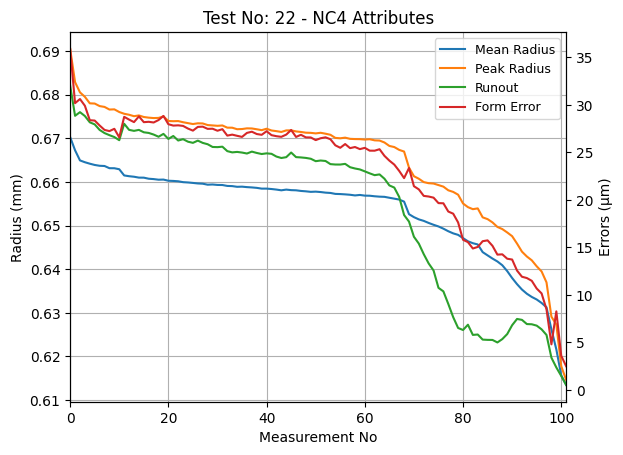

In [14]:
exps[7].nc4.plot_att()
fig = plt.gcf()
ax = fig.gca()
ax.set_title('')
fig.set_dpi(100)

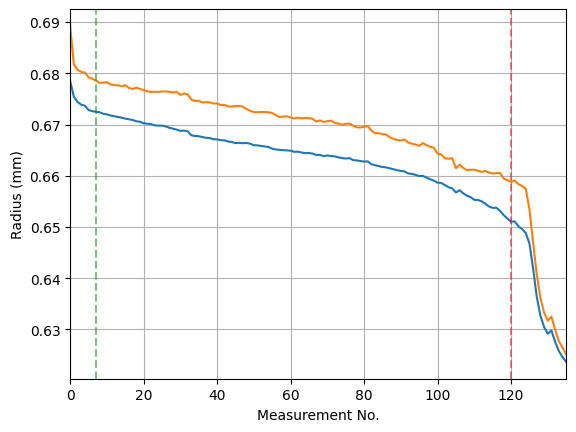

In [27]:
ix = 4

fig, ax = plt.subplots()
ax.plot(m_rad[ix], label='Mean Radius')
ax.plot(p_rad[ix], label='Peak Radius')
ax.set_xlim(0, len(m_rad[ix])-1)
ax.set_xlabel('Measurement No.')
ax.set_ylabel('Radius (mm)')
ax.set_axisbelow(True)
ax.grid(True)
ax.axvline(7, color='g', linestyle='--', alpha=0.5)
ax.axvline(120, color='r', linestyle='--', alpha=0.5)

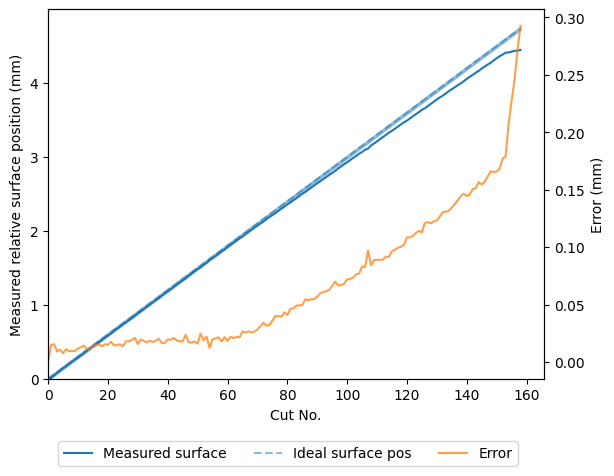

In [51]:
exps[9].probe.plot_probe_DOC()
fig = plt.gcf()
fig.set_dpi(100)

Text(0, 0.5, 'Probed Radial DOC (mm)')

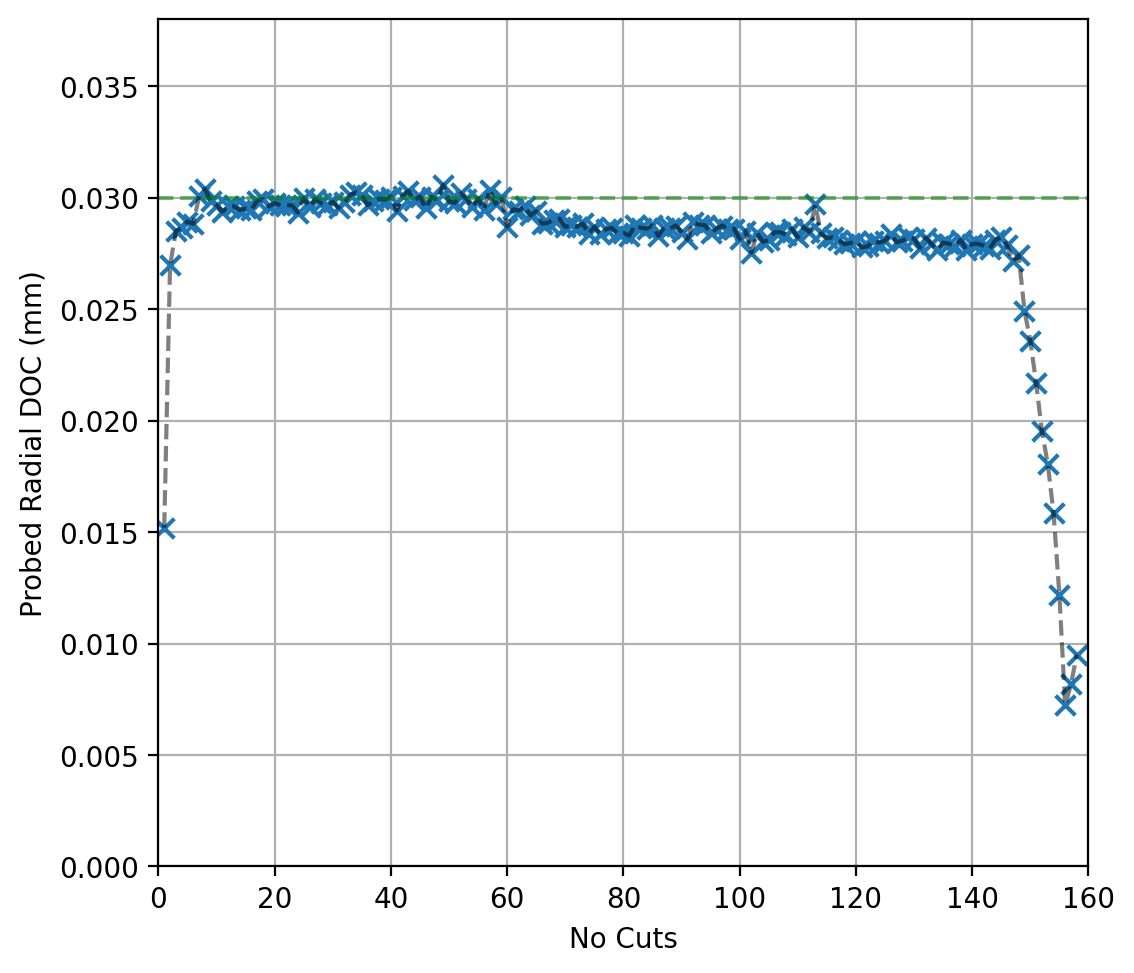

In [58]:
fig, ax = plt.subplots(figsize=(6, 5.5), dpi=200)
y = dfs[9]['Probe diff']
x = np.arange(len(y))
ax.plot(x, y, 'k--', alpha=0.5)
ax.axhline(doc, color='g', linestyle='--', alpha=0.5)
# ax.axhline(doc - tol, color='r', ls='--', alpha=0.5)
# ax.axhline(doc + tol, color='r', ls='--', alpha=0.5)
ax.scatter(x, y, s=50, color='C0', marker='x')
# ax.set_title(f'Test {i + 1} - Runout: {df["Runout"].iloc[0]:.0f} um')
ax.set_xlabel('No Cuts')
ax.set_ylim(0, 0.038)
ax.set_xlim(0, 160)
ax.set_axisbelow(True)
ax.grid(True)
ax.set_ylabel('Probed Radial DOC (mm)')

## Probe Data

In [47]:
dfs = [exp.features.copy() for exp in exps]

In [48]:
doc = 0.03
tol = 0.0015
overall_tol = 0.02

In [49]:
def _smooth(sig, win=11):
    """
    Smooth signal using a moving average filter.

    Replicates MATLAB's smooth function. (http://tinyurl.com/374kd3ny)

    Args:
        sig (np.array): Signal to smooth.
        win (int, optional): Window size. Defaults to 11.

    Returns:
        np.array: Smoothed signal.
    """
    out = np.convolve(sig, np.ones(win, dtype=int), 'valid') / win
    r = np.arange(1, win - 1, 2)
    start = np.cumsum(sig.iloc[:win - 1])[::2] / r
    stop = (np.cumsum(sig.iloc[:-win:-1])[::2] / r)[::-1]
    return np.concatenate((start, out, stop))

In [50]:
# Smooth probe data
win = 11

for df in dfs:
    # df.loc[2:, 'Avg probe'] = df.loc[2:, 'Avg probe'] - df.loc[:2, 'Avg probe'].mean()
    # df.loc[:2, 'Avg probe'] = np.NaN
    df.loc[0, 'Probe diff'] = np.NaN
    df.loc[1:, 'Probe diff'] = _smooth(df.loc[1:, 'Probe diff'], win=win)

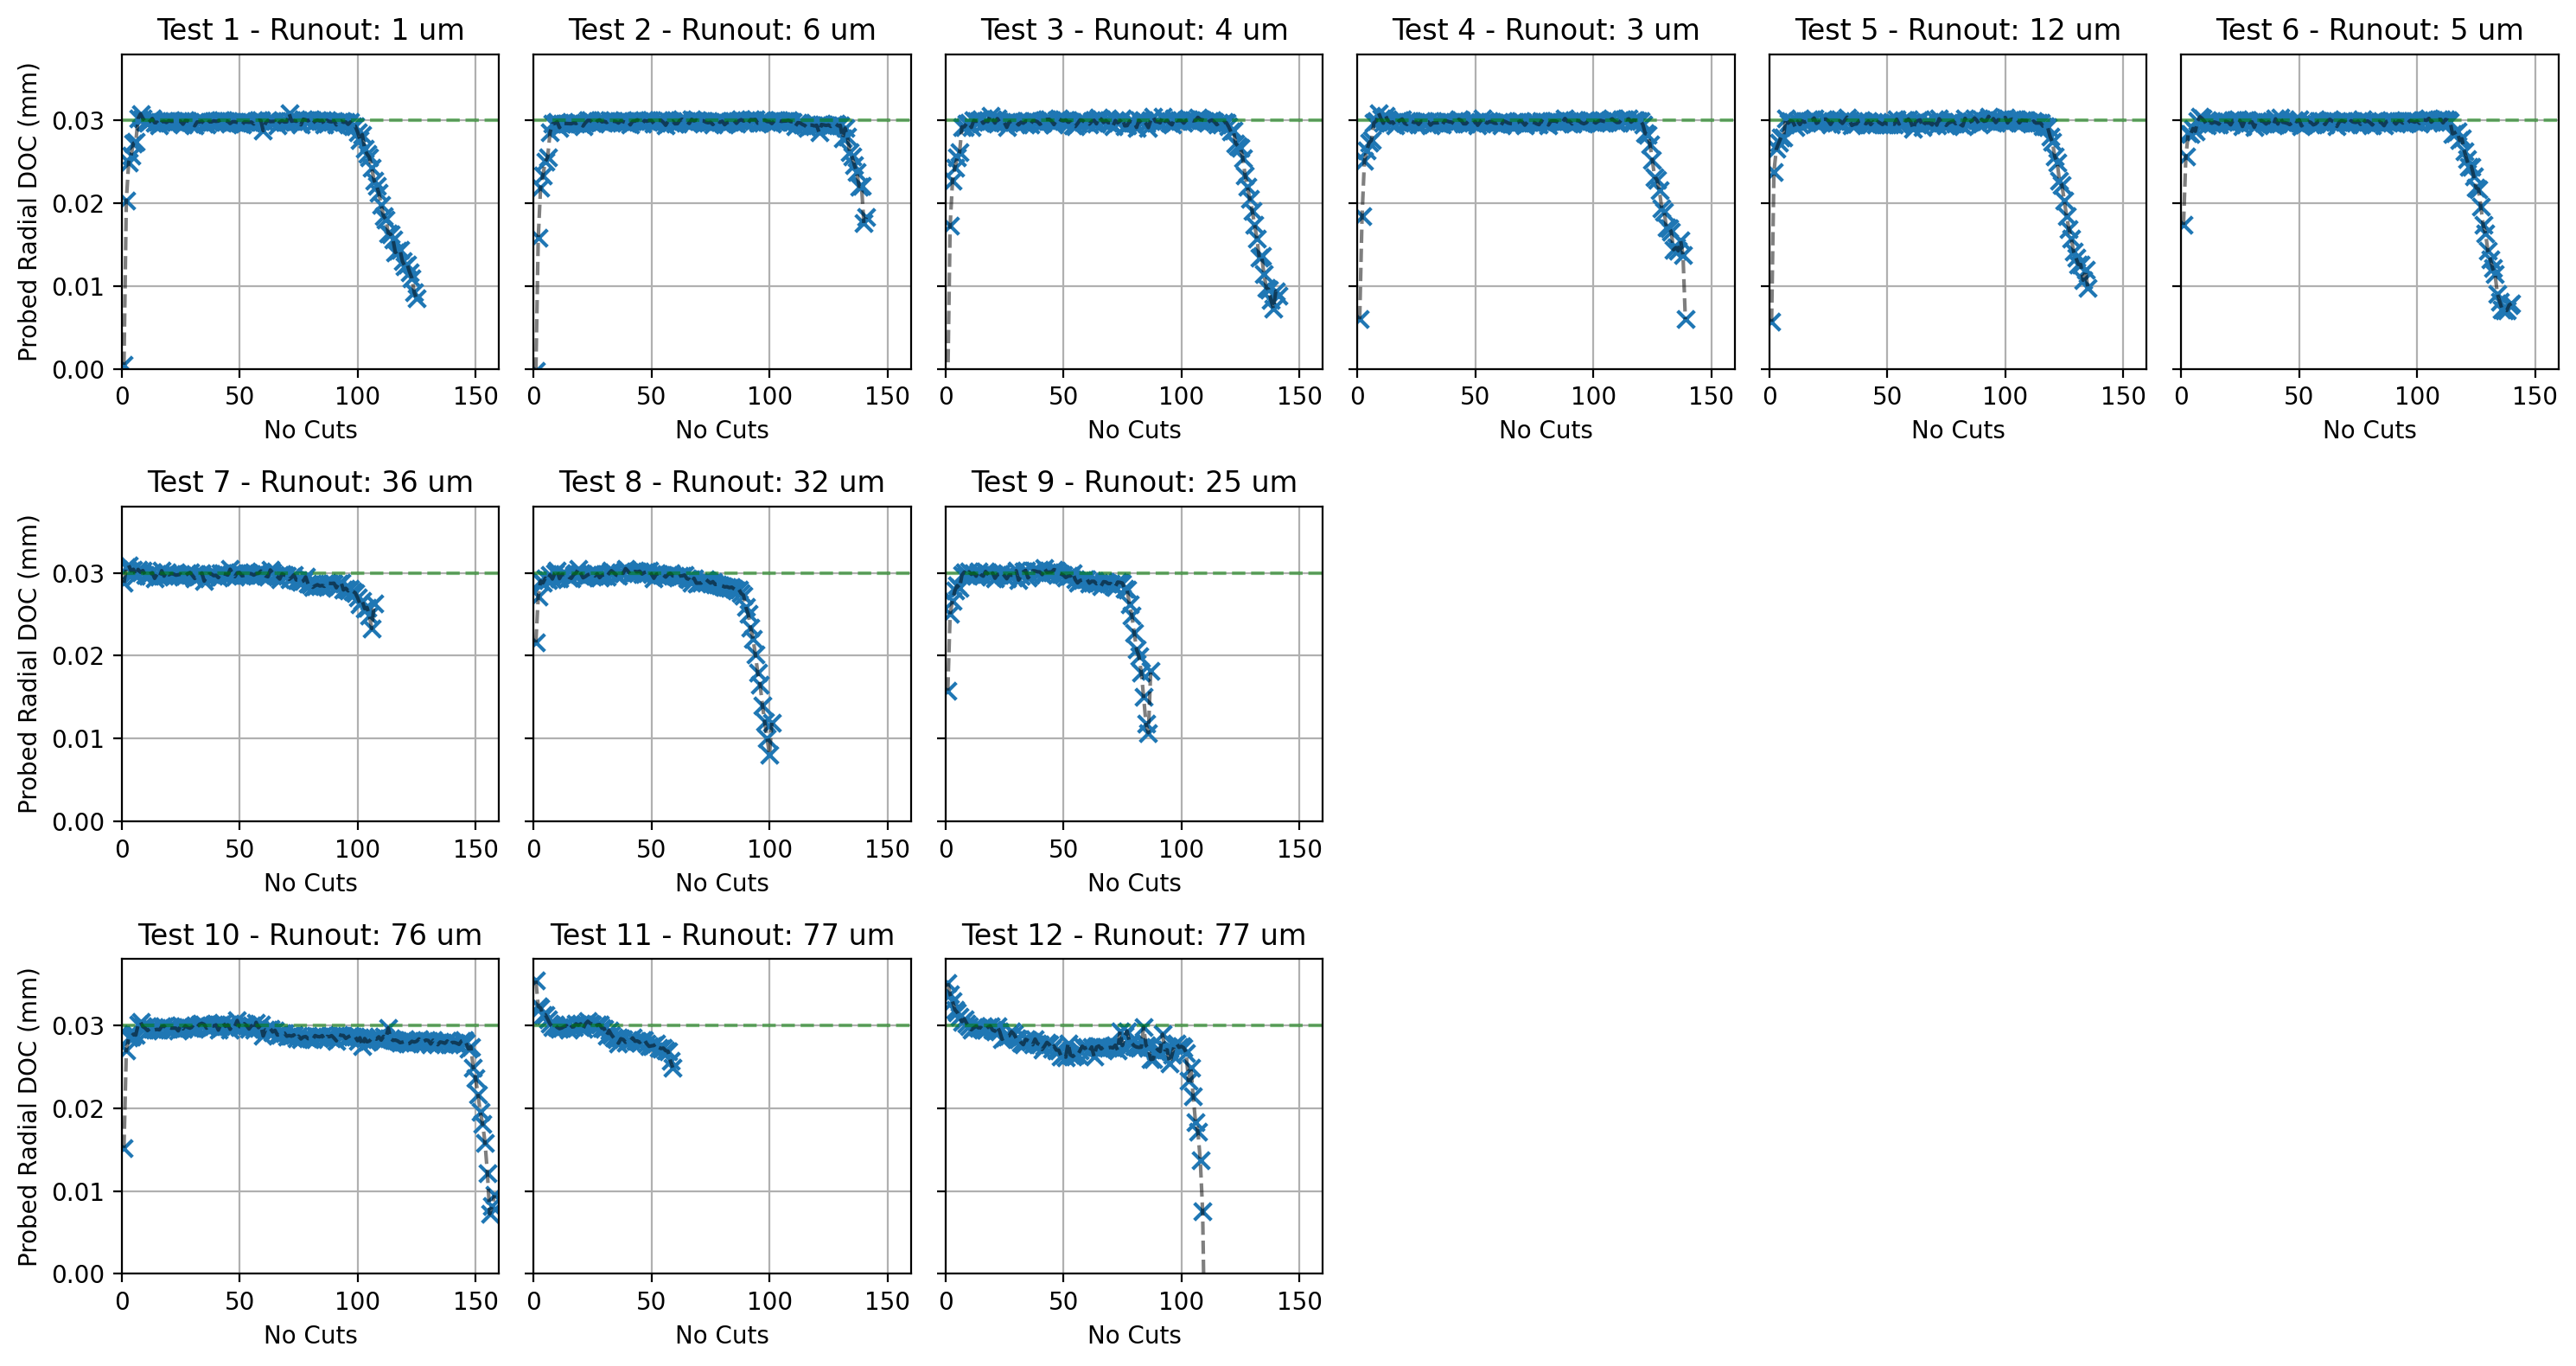

In [165]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey='row', dpi=200)

ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx
    y = df['Probe diff']
    x = np.arange(len(y))
    ax[ax_row, ax_col].plot(x, y, 'k--', alpha=0.5)
    ax[ax_row, ax_col].axhline(doc, color='g', linestyle='--', alpha=0.5)
    # ax[ax_row, ax_col].axhline(doc - tol, color='r', ls='--', alpha=0.5)
    # ax[ax_row, ax_col].axhline(doc + tol, color='r', ls='--', alpha=0.5)
    ax[ax_row, ax_col].scatter(x, y, s=50, color='C0', marker='x')
    ax[ax_row, ax_col].set_title(f'Test {i + 1} - Runout: {df["Runout"].iloc[0]:.0f} um')
    ax[ax_row, ax_col].set_xlabel('No Cuts')
    ax[ax_row, ax_col].set_ylim(0, 0.038)
    ax[ax_row, ax_col].set_xlim(0, 160)
    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)
    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Probed Radial DOC (mm)')

# remove unsured axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

fig.tight_layout()

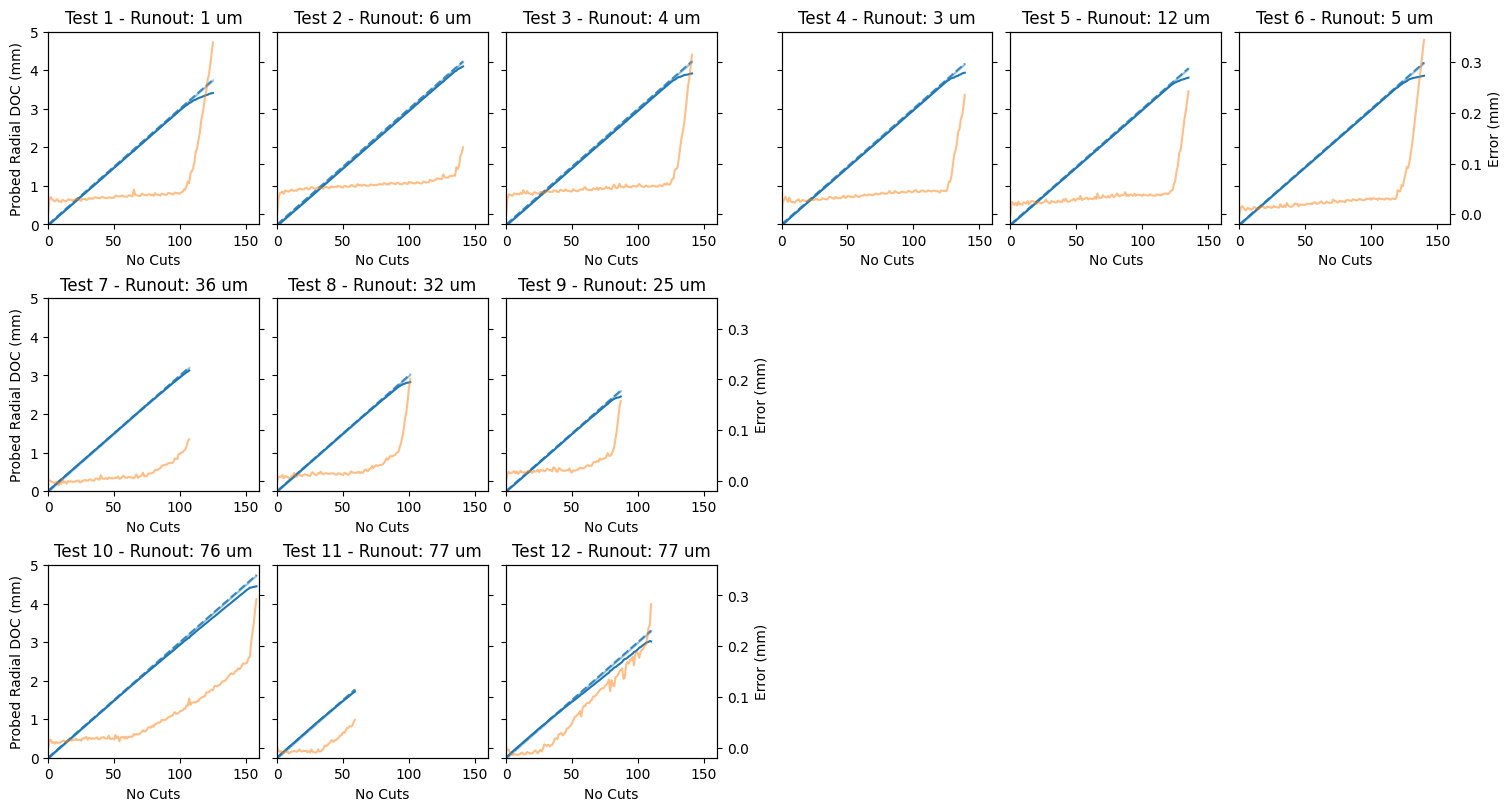

In [15]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey='row', constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx
    y_measured = df['Avg probe']
    x = np.arange(len(y_measured))

    ax[ax_row, ax_col].plot(x, y_measured,)

    y_ideal = x * doc
    ax[ax_row, ax_col].plot(x, y_ideal, 'C0--', alpha=0.8)

    y_tol = (y_ideal + overall_tol, y_ideal - overall_tol)
    ax[ax_row, ax_col].fill_between(x, y_tol[0], y_tol[1], color='C0', alpha=0.3)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(y_ideal - y_measured, color='C1', alpha=0.5)
    # ax_twin[ax_row, ax_col].axhline(0, color='C1', ls='--', alpha=0.5)
    # ax_twin[ax_row, ax_col].axhline(+ overall_tol, color='C1', ls='--', alpha=0.5)

    
    ax[ax_row, ax_col].set_title(f'Test {i + 1} - Runout: {df["Runout"].iloc[0]:.0f} um')
    ax[ax_row, ax_col].set_xlabel('No Cuts')
    ax[ax_row, ax_col].set_ylim(0, 5)
    ax[ax_row, ax_col].set_xlim(0, 160)
    # ax[ax_row, ax_col].set_axisbelow(True)
    # ax[ax_row, ax_col].grid(True)
    ax_twin[ax_row, ax_col].set_ylim(-0.02, 0.36)
    # ax_twin[ax_row, ax_col].yaxis.set_tick_params(labelright=False)
    if i not in [5, 8, 11]:
        ax_twin[ax_row, ax_col].set(ylabel=None)
        ax_twin[ax_row, ax_col].set_yticklabels([])

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Probed Radial DOC (mm)')

ax_twin[0, 5].yaxis.set_tick_params(labelright=True)
ax_twin[0, 5].set_ylabel('Error (mm)')
ax_twin[1, 2].yaxis.set_tick_params(labelright=True)
ax_twin[1, 2].set_ylabel('Error (mm)')
ax_twin[2, 2].yaxis.set_tick_params(labelright=True)
ax_twin[2, 2].set_ylabel('Error (mm)')

# remove unsured axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')


## NC4 Data

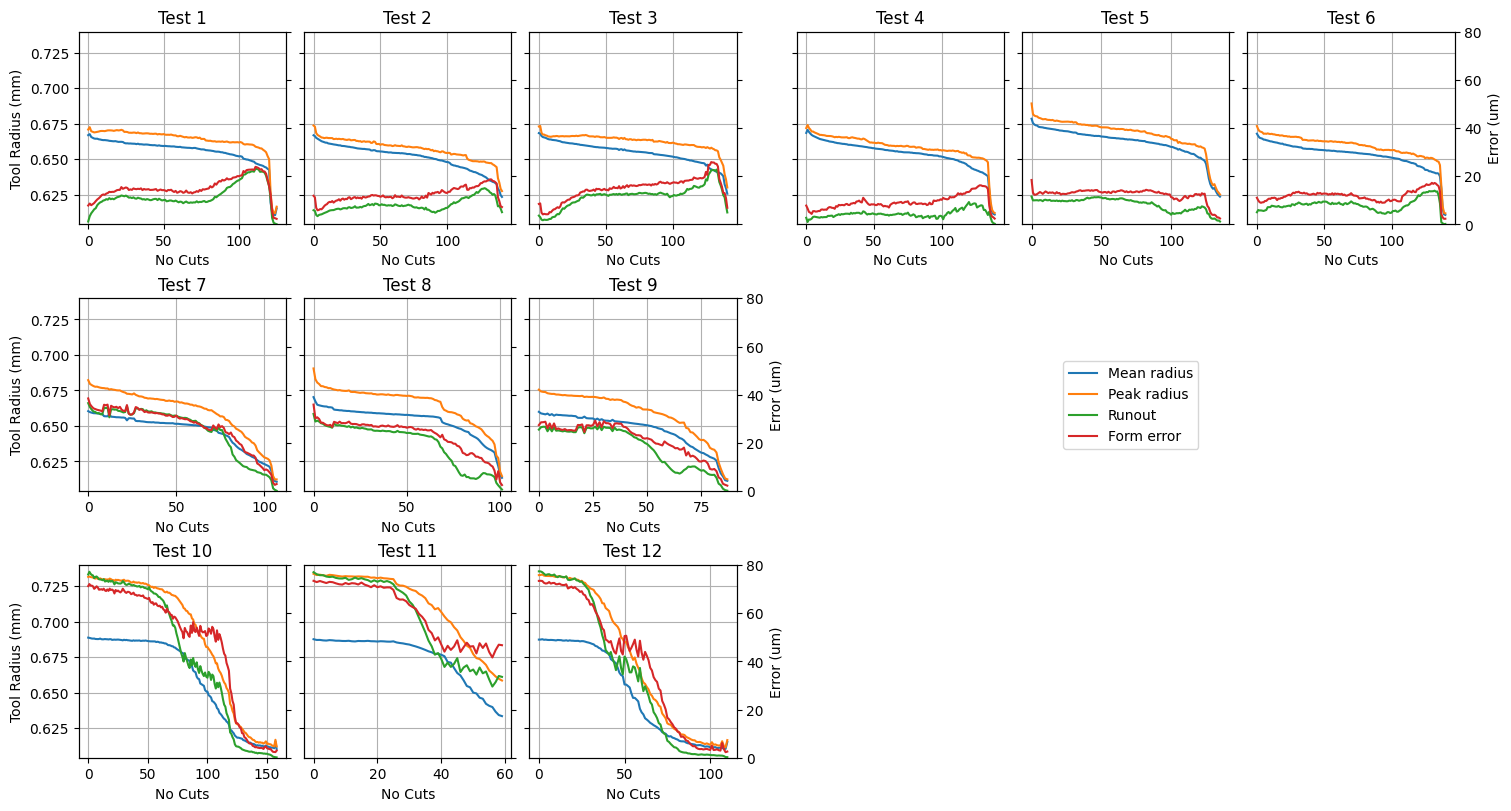

In [62]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey=True, constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    ax[ax_row, ax_col].plot(df['Mean radius'], 'C0', label='Mean radius')
    ax[ax_row, ax_col].plot(df['Peak radius'], 'C1', label='Peak radius')

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Runout'], 'C2', label='Runout')
    ax_twin[ax_row, ax_col].plot(df['Form error'], 'C3', label='Form error')

    
    ax_twin[ax_row, ax_col].set_ylim(-0.02, 80)
    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')
    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)
    # ax_twin[ax_row, ax_col].set_ylim(-0.02, 0.36)
    # ax_twin[ax_row, ax_col].yaxis.set_tick_params(labelright=False)
    if i not in [5, 8, 11]:
        ax_twin[ax_row, ax_col].set(ylabel=None)
        ax_twin[ax_row, ax_col].set_yticklabels([])

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Tool Radius (mm)')

ax_twin[0, 5].yaxis.set_tick_params(labelright=True)
ax_twin[0, 5].set_ylabel('Error (um)')
ax_twin[1, 2].yaxis.set_tick_params(labelright=True)
ax_twin[1, 2].set_ylabel('Error (um)')
ax_twin[2, 2].yaxis.set_tick_params(labelright=True)
ax_twin[2, 2].set_ylabel('Error (um)')


# remove unsured axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

l1, lab1 = ax[ax_row, ax_col].get_legend_handles_labels()
l2, lab2 = ax_twin[ax_row, ax_col].get_legend_handles_labels()
plt.figlegend(l1 + l2, lab1 + lab2,
              loc='center',
              bbox_to_anchor=(0.75, 0.5),
              ncol=1,
              )


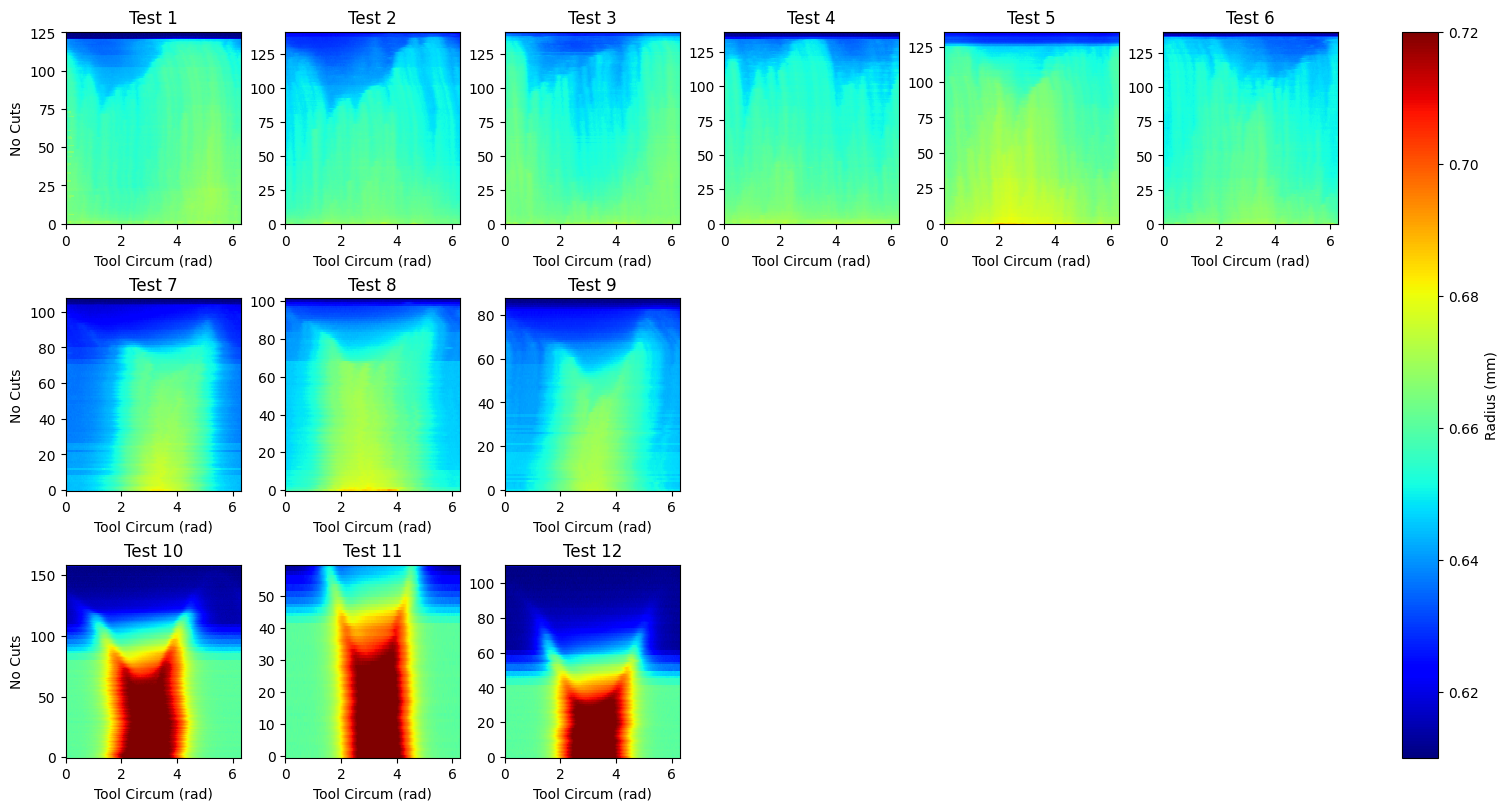

In [17]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

vmin = 0.61; vmax = 0.72

for i, (exp, ax_idx) in enumerate(zip(exps, ax_pos)):
    ax_row, ax_col = ax_idx

    r = np.array(exp.nc4.radius, dtype=float)
    x = np.array(exp.nc4.theta, dtype=float)
    y = np.array(exp.nc4._datano, dtype=float)
    surf = ax[ax_row, ax_col].pcolormesh(x,
                              y,
                              r,
                              cmap='jet',
                              rasterized=True,
                              shading='nearest',
                              vmin=vmin,
                              vmax=vmax
                              )
    ax[ax_row, ax_col].set_title(f'Test {i+1}')

    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('Tool Circum (rad)')

    # ax[ax_row, ax_col].set_axisbelow(True)
    # ax[ax_row, ax_col].grid(True)

    # try: 
    #     cutoffs
    #     ax[ax_row, ax_col].axhline(cutoffs[i], color='r', ls='--', alpha=0.5)
    #     ax[ax_row, ax_col].text(0.5, cutoffs[i], f'Cut {cutoffs[i]:.0f}', color='r', ha='left', va='bottom')
    # except NameError:
    #     pass

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('No Cuts')
fig.colorbar(surf, ax=ax,label='Radius (mm)')

# remove unsured axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

## AE Data

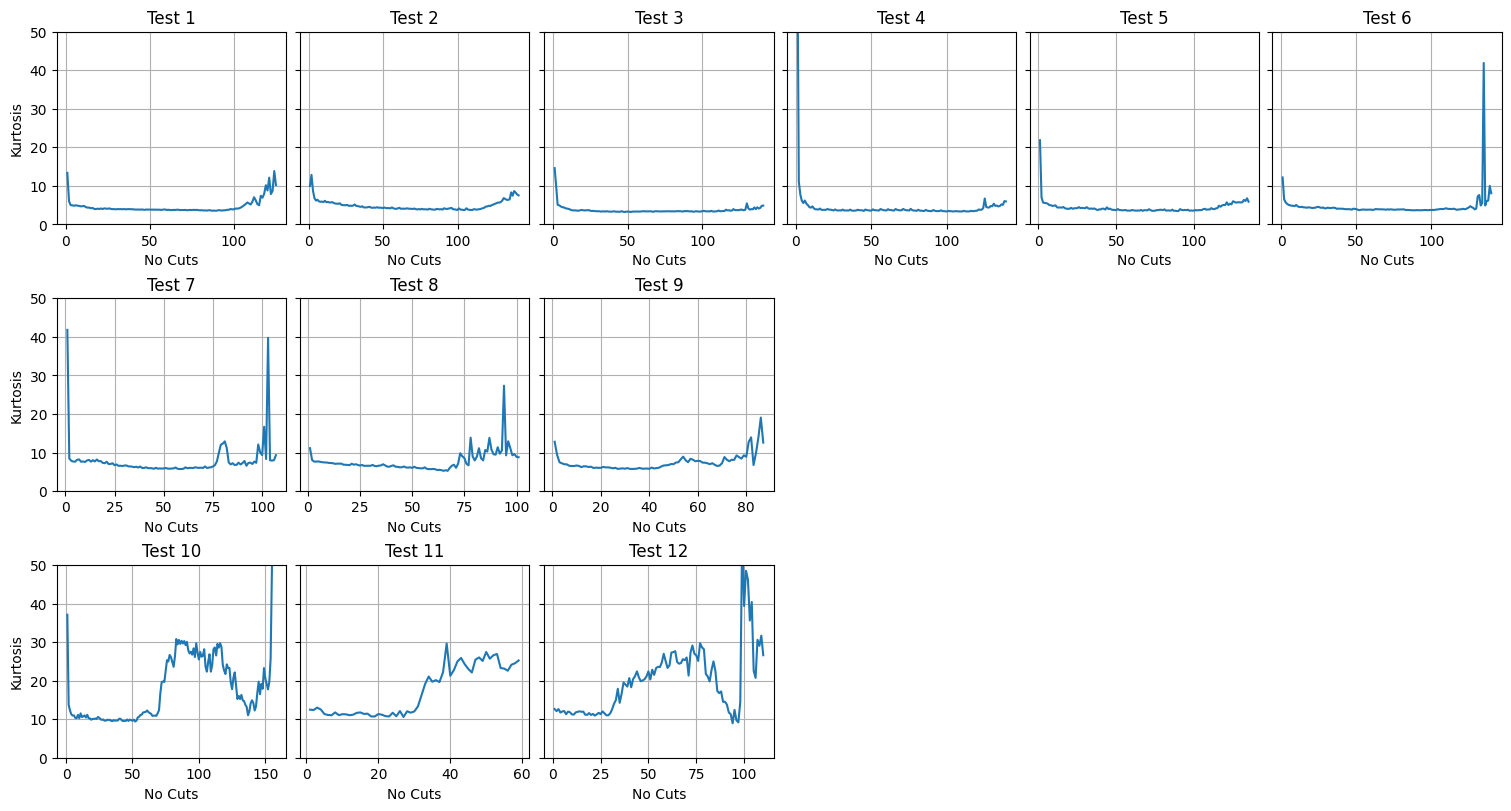

In [164]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey='row', constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    ax[ax_row, ax_col].plot(df['Kurtosis'])

    ax[ax_row, ax_col].set_title(f'Test {i+1}')

    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')
    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)
    ax[ax_row, ax_col].set_ylim(0, 50)

    # if ax_row == 0:
    #     ax[ax_row, ax_col].set_ylim(0, 20)
    # elif ax_row == 1:
    #     ax[ax_row, ax_col].set_ylim(0, 30)
    # else:
    #     ax[ax_row, ax_col].set_ylim(0, 50)
    
    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Kurtosis')

# remove unsured axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

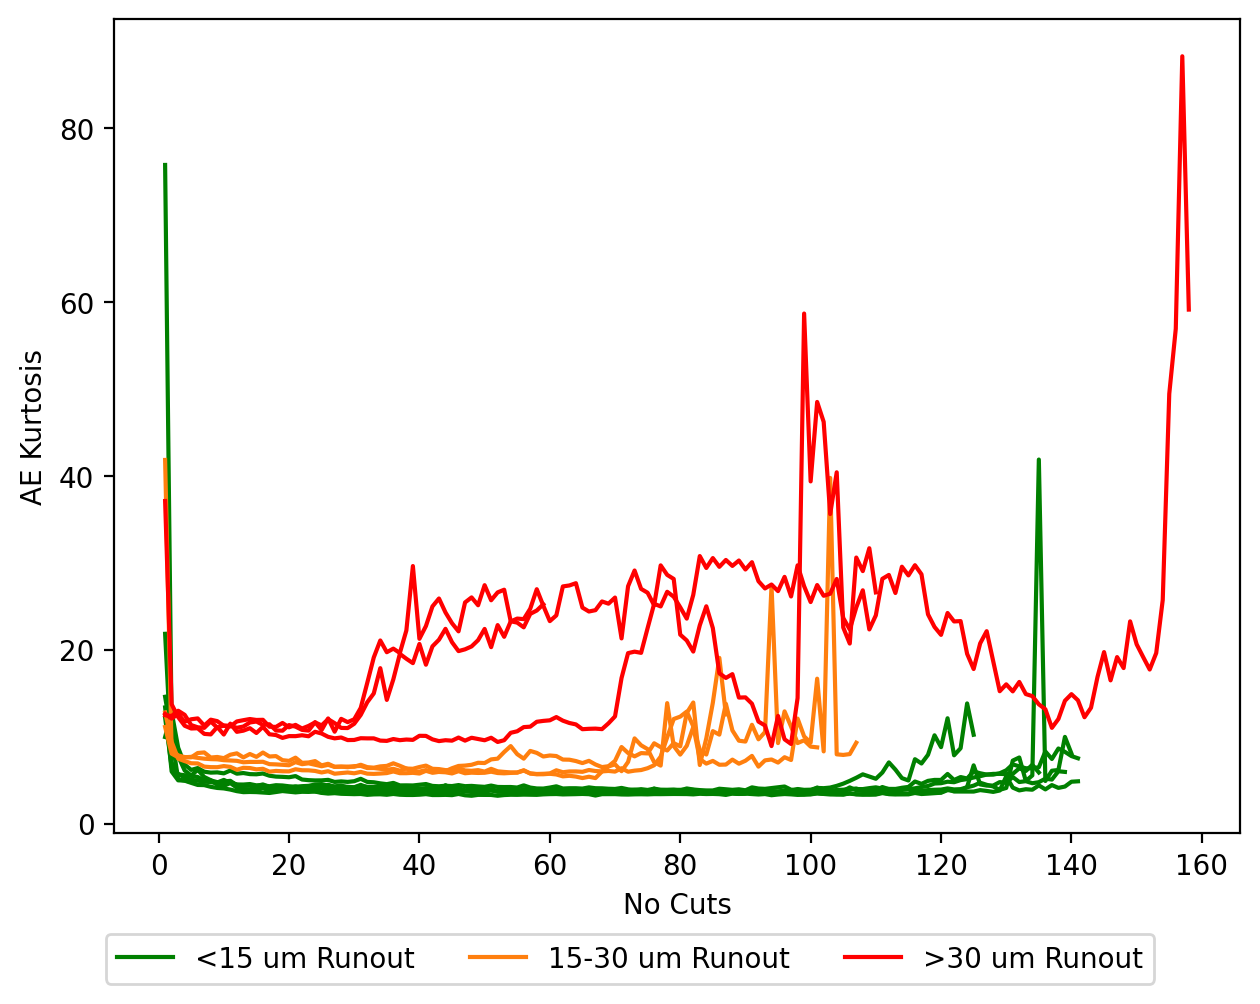

In [95]:
fig, ax = plt.subplots(dpi = 200)
for i, df in enumerate(dfs):
    if i < 6:
        c = 'g'
        l1 = ax.plot(df['Kurtosis'], color=c, label='<15 um Runout')
    elif i < 9:
        c = 'C1'
        l2 = ax.plot(df['Kurtosis'], color=c, label='15-30 um Runout')
    else:
        c = 'r'
        l3 = ax.plot(df['Kurtosis'], color=c, label='>30 um Runout')

ax.set_xlabel('No Cuts')
ax.set_ylabel('AE Kurtosis')
lines, labs = ax.get_legend_handles_labels()
lines = [lines[0], lines[6], lines[11]]
labs = [labs[0], labs[6], labs[11]]
fig.legend(lines, labs, ncols=3, loc='center', bbox_to_anchor=(0.5, -0.01))
# ax.set_yscale('log')
# ax.set_ylim(0, 20)
fig.tight_layout()

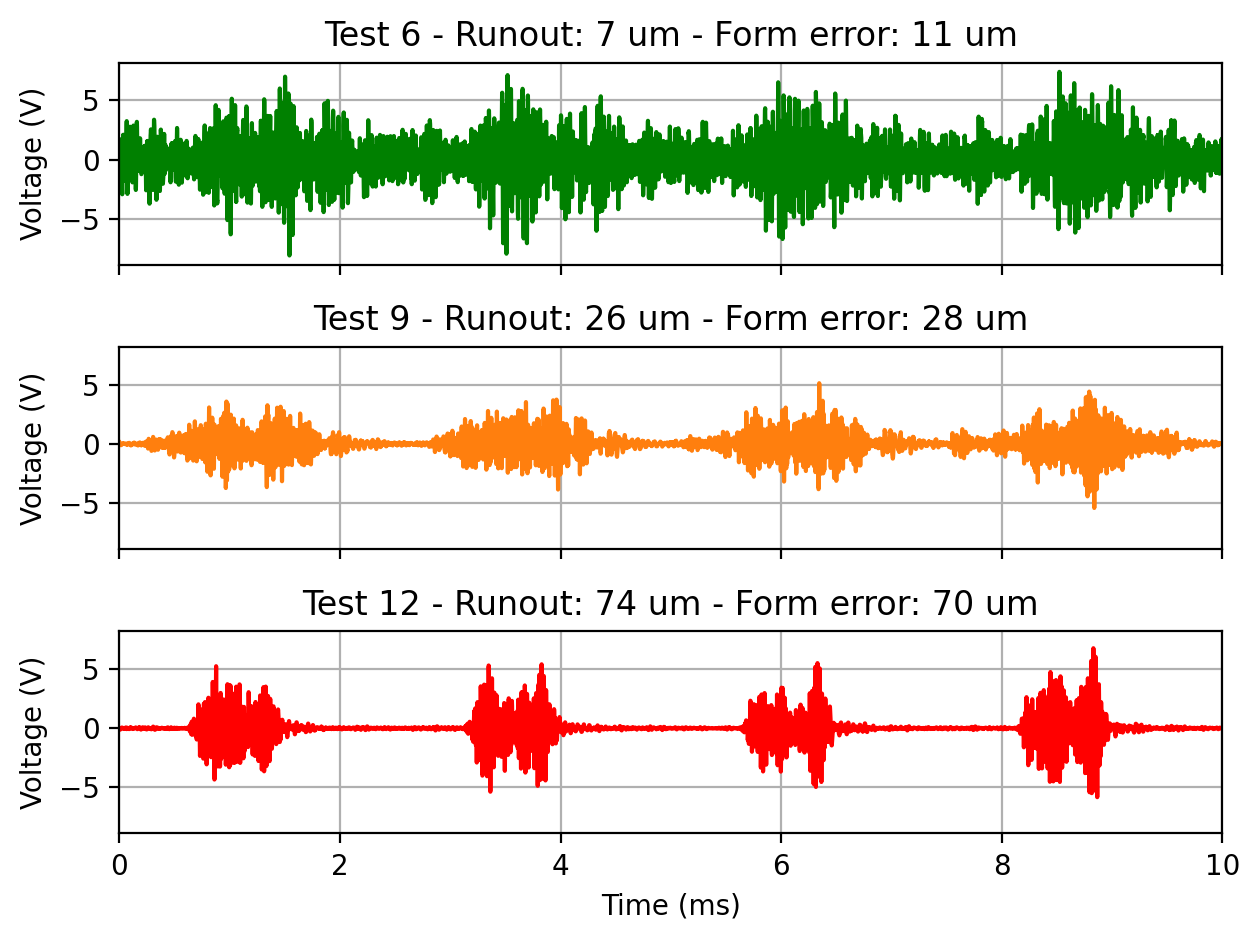

In [65]:
# Plot signals on top of each other
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True, dpi=200)

cut_no = 20

sig1 = exps[5].ae.readAE(cut_no)[20_000_000:20_020_000]
sig2 = exps[8].ae.readAE(cut_no)[20_000_000:20_020_000]
sig3 = exps[11].ae.readAE(cut_no)[20_000_000:20_020_000]

fs = 2_000_000
t = np.arange(0, len(sig1)/fs, 1/fs) * 1000

ax[0].plot(t, sig1, 'g', label='Test 6')
ax[1].plot(t, sig2, 'C1', label='Test 9')
ax[2].plot(t, sig3, 'r', label='Test 12')

ax[2].set_xlim(0, 10)
ax[2].set_xlabel('Time (ms)')

ax[0].set_title(f'Test 6 - Runout: {exps[5].features["Runout"].iloc[cut_no]:.0f} um - Form error: {exps[5].features["Form error"].iloc[cut_no]:.0f} um')
ax[1].set_title(f'Test 9 - Runout: {exps[8].features["Runout"].iloc[cut_no]:.0f} um - Form error: {exps[8].features["Form error"].iloc[cut_no]:.0f} um')
ax[2].set_title(f'Test 12 - Runout: {exps[11].features["Runout"].iloc[cut_no]:.0f} um - Form error: {exps[11].features["Form error"].iloc[cut_no]:.0f} um')

for ax_ in ax:
    ax_.set_ylabel('Voltage (V)')
    ax_.grid(True)

fig.tight_layout()

In [ ]:
sig1 = exps[5].ae.readAE(5)
sig2 = exps[8].ae.readAE(5)
sig3 = exps[11].ae.readAE(5)

In [83]:
print(stats.kurtosis(sig1))
print(stats.kurtosis(sig2))
print(stats.kurtosis(sig3))

2.3217386757044034
4.307835866136234
9.106007552960605


Text(0, 0.5, 'Frequency')

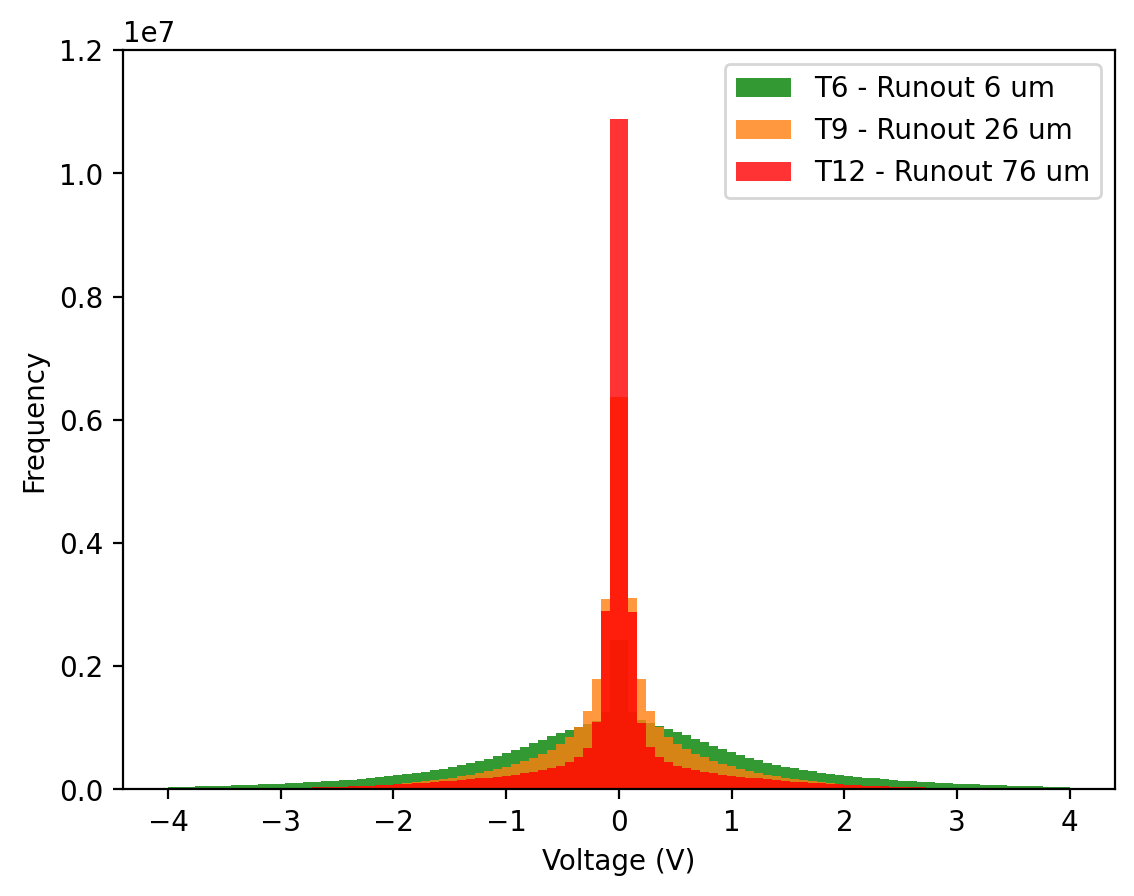

In [78]:
fig, ax = plt.subplots(dpi=200)
ax.hist(sig1, bins=100, range=(-4, 4), alpha=0.8, label=f"T6 - Runout {exps[5].features['Runout'].iloc[5]:.0f} um ", color='g')
ax.hist(sig2, bins=100, range=(-4, 4), alpha=0.8, label=f"T9 - Runout {exps[8].features['Runout'].iloc[5]:.0f} um", color='C1')
ax.hist(sig3, bins=100, range=(-4, 4), alpha=0.8, label=f"T12 - Runout {exps[11].features['Runout'].iloc[5]:.0f} um", color='r')

ax.legend()
ax.set_ylim(0, 1.2e7)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Frequency')

Linear Fit:
Eqn: y = 9.738x + -37.681
R^2: 0.938
RMSE: 6.901
MAE: 5.459

Linear Fit eval whole dataset:
RMSE: 77.634
MAE: 35.117
R^2: -14.116


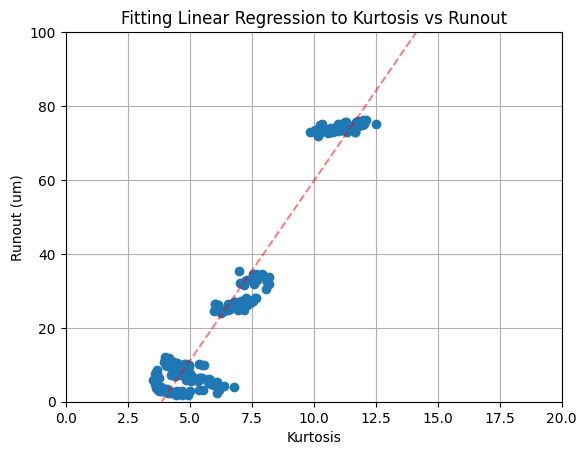

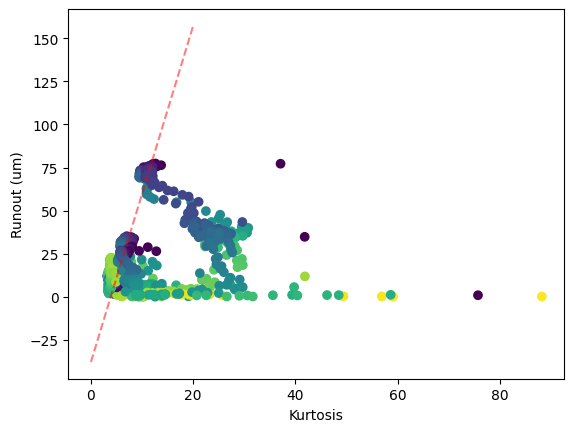

In [108]:
fig, ax = plt.subplots()

# data = pd.concat([df.iloc[5:w_idx-5, :][['Runout', 'Kurtosis']] for df, w_idx in zip(dfs, wear_out_idx)])
data = pd.concat([df.iloc[4:25, :][['Runout', 'Kurtosis']] for df, w_idx in zip(dfs, wear_out_idx)])

ax.scatter(data['Kurtosis'], data['Runout'])

from scipy import stats
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

res = stats.linregress(data['Kurtosis'], data['Runout'])
x = np.linspace(0, 20, 100)
y = res.intercept + res.slope * x
ax.plot(x, y, 'r--', alpha=0.5)
print('Linear Fit:')
print(f'Eqn: y = {res.slope:.3f}x + {res.intercept:.3f}')
print(f'R^2: {res.rvalue**2:.3f}')
print(f'RMSE: {root_mean_squared_error(data["Runout"], res.intercept + res.slope * data["Kurtosis"]):.3f}')
print(f'MAE: {mean_absolute_error(data["Runout"], res.intercept + res.slope * data["Kurtosis"]):.3f}')

ax.set_ylim(0, 100)
ax.set_xlim(0, 20)
ax.set_ylabel('Runout (um)')
ax.set_xlabel('Kurtosis')
ax.set_axisbelow(True)
ax.grid(True)
ax.set_title('Fitting Linear Regression to Kurtosis vs Runout')

# data = pd.concat([df.iloc[5:w_idx, :][['Runout', 'Kurtosis']] for df, w_idx in zip(dfs, wear_out_idx)])
data = pd.concat([df.iloc[1:, :][['Runout', 'Kurtosis', 'Mean radius']] for df, w_idx in zip(dfs, wear_out_idx)])
fig, ax = plt.subplots()
ax.scatter(data['Kurtosis'], data['Runout'], c=data.index)
ax.plot(x, y, 'r--', alpha=0.5)
# ax.set_ylim(0, 100)
# ax.set_xlim(0, 20)
ax.set_xlabel('Kurtosis')
ax.set_ylabel('Runout (um)')


print('\nLinear Fit eval whole dataset:')
y_pred = res.intercept + res.slope * data['Kurtosis']
# rmse
rmse = root_mean_squared_error(data['Runout'], y_pred)
print(f'RMSE: {rmse:.3f}')

# mae
mae = mean_absolute_error(data['Runout'], y_pred)
print(f'MAE: {mae:.3f}')
# r2
r2 = r2_score(data['Runout'], y_pred)
print(f'R^2: {r2:.3f}')


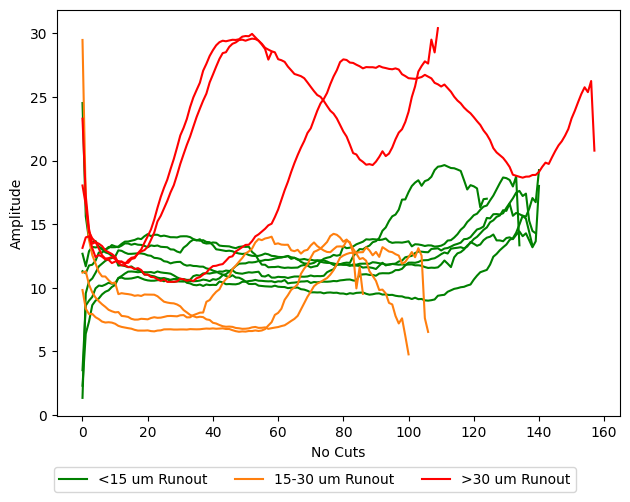

In [21]:
fig, ax = plt.subplots()
for i, df in enumerate(dfs):
    if i < 6:
        c = 'g'
        l1 = ax.plot(_smooth(df['Amplitude'][1:], 21), color=c, label='<15 um Runout')
    elif i < 9:
        c = 'C1'
        l2 = ax.plot(_smooth(df['Amplitude'][1:], 21), color=c, label='15-30 um Runout')
    else:
        c = 'r'
        l3 = ax.plot(_smooth(df['Amplitude'][1:], 21), color=c, label='>30 um Runout')

ax.set_xlabel('No Cuts')
ax.set_ylabel('Amplitude')
lines, labs = ax.get_legend_handles_labels()
lines = [lines[0], lines[6], lines[11]]
labs = [labs[0], labs[6], labs[11]]
fig.legend(lines, labs, ncols=3, loc='center', bbox_to_anchor=(0.5, -0.01))
fig.tight_layout()

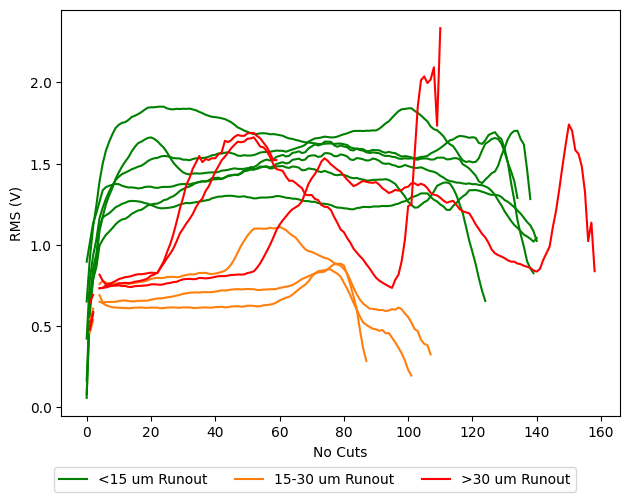

In [22]:
fig, ax = plt.subplots()
for i, df in enumerate(dfs):
    if i < 6:
        c = 'g'
        l1 = ax.plot(_smooth(df['RMS'][1:], 7), color=c, label='<15 um Runout')
    elif i < 9:
        c = 'C1'
        l2 = ax.plot(_smooth(df['RMS'], 7), color=c, label='15-30 um Runout')
    else:
        c = 'r'
        l3 = ax.plot(_smooth(df['RMS'], 7), color=c, label='>30 um Runout')

ax.set_xlabel('No Cuts')
ax.set_ylabel('RMS (V)')
lines, labs = ax.get_legend_handles_labels()
lines = [lines[0], lines[6], lines[11]]
labs = [labs[0], labs[6], labs[11]]
fig.legend(lines, labs, ncols=3, loc='center', bbox_to_anchor=(0.5, -0.01))
fig.tight_layout()

### Threshold based on statistical analysis

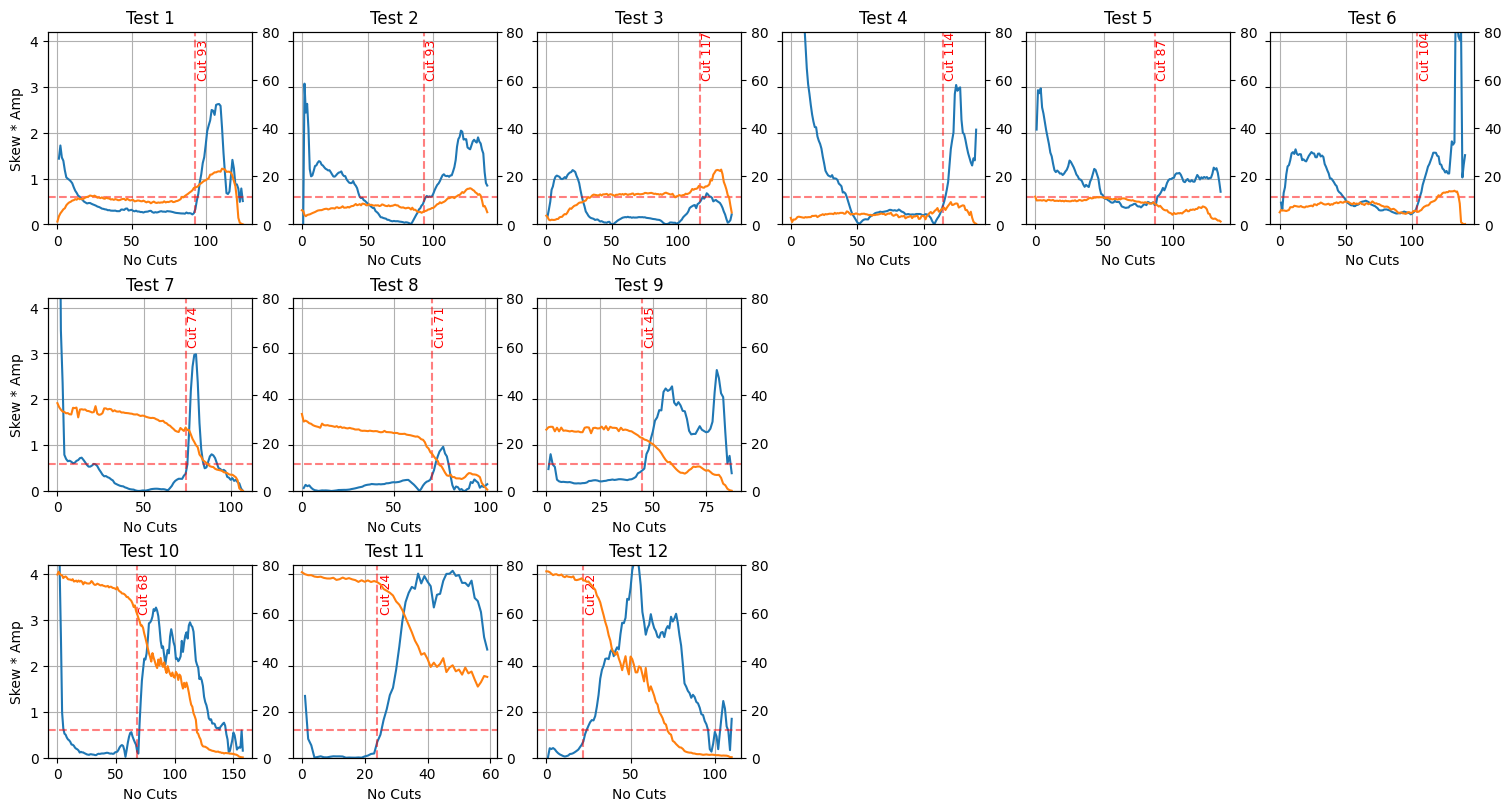

In [23]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey='row', constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y = df['Skewness'][1:] * df['Amplitude'][1:]
    y = _smooth(y, 5)
    error = np.abs(y)

    threshold = 0.6

    ax[ax_row, ax_col].plot(x, error)

    # crossing index where gradient is positive
    idx = np.where(np.diff(np.sign(error - threshold)))[0]
    grad = np.gradient(error)
    idx = idx[grad[idx] > 0]
    idx = idx[idx > 5]
    cutoffs.append(idx[0])

    ax[ax_row, ax_col].axhline(threshold, color='r', ls='--', alpha=0.5)
    ax[ax_row, ax_col].axvline(idx[0], color='r', ls='--', alpha=0.5)
    ax[ax_row, ax_col].text(idx[0] + 1, 3.2, f'Cut {idx[0]}', color='r', fontsize=9, rotation=90)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Runout'], 'C1', label='Runout')
    ax_twin[ax_row, ax_col].set_ylim(0, 80)

    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    ax[ax_row, ax_col].set_ylim(0, 4.2)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Skew * Amp')

# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

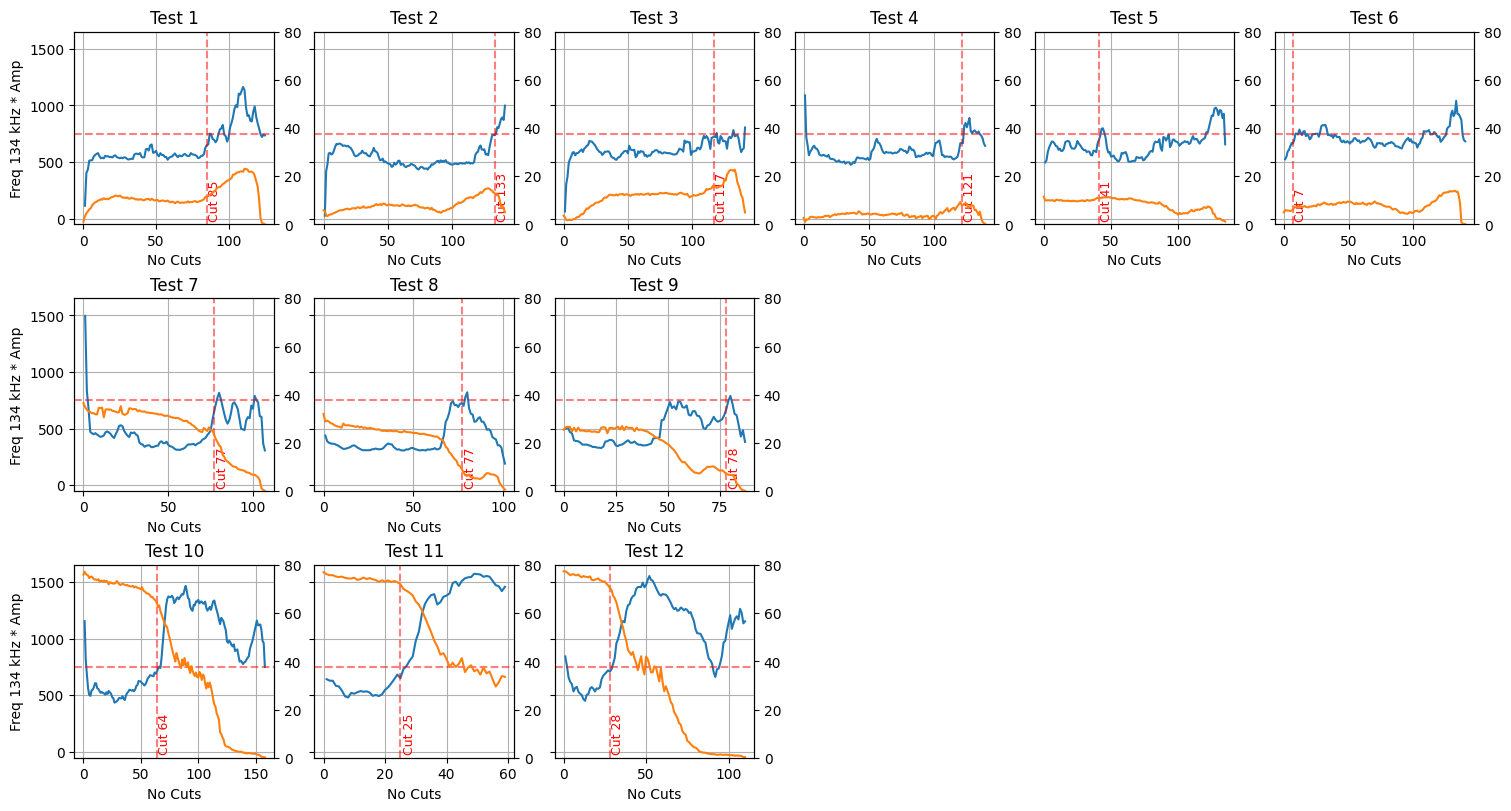

In [24]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey=True, constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y = df['Freq 134 kHz'][1:] * df['Amplitude'][1:]
    y = _smooth(y, 5)
    error = np.abs(y)

    threshold = 750

    ax[ax_row, ax_col].plot(x, error)

    # crossing index where gradient is positive
    idx = np.where(np.diff(np.sign(error - threshold)))[0]
    grad = np.gradient(error)
    idx = idx[grad[idx] > 0]
    idx = idx[idx > 5]
    cutoffs.append(idx[0])

    ax[ax_row, ax_col].axhline(threshold, color='r', ls='--', alpha=0.5)
    ax[ax_row, ax_col].axvline(idx[0], color='r', ls='--', alpha=0.5)
    ax[ax_row, ax_col].text(idx[0] + 1, 3.2, f'Cut {idx[0]}', color='r', fontsize=9, rotation=90)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Runout'], 'C1', label='Runout')
    ax_twin[ax_row, ax_col].set_ylim(0, 80)

    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    # ax[ax_row, ax_col].set_ylim(0, 100)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Freq 134 kHz * Amp')

# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

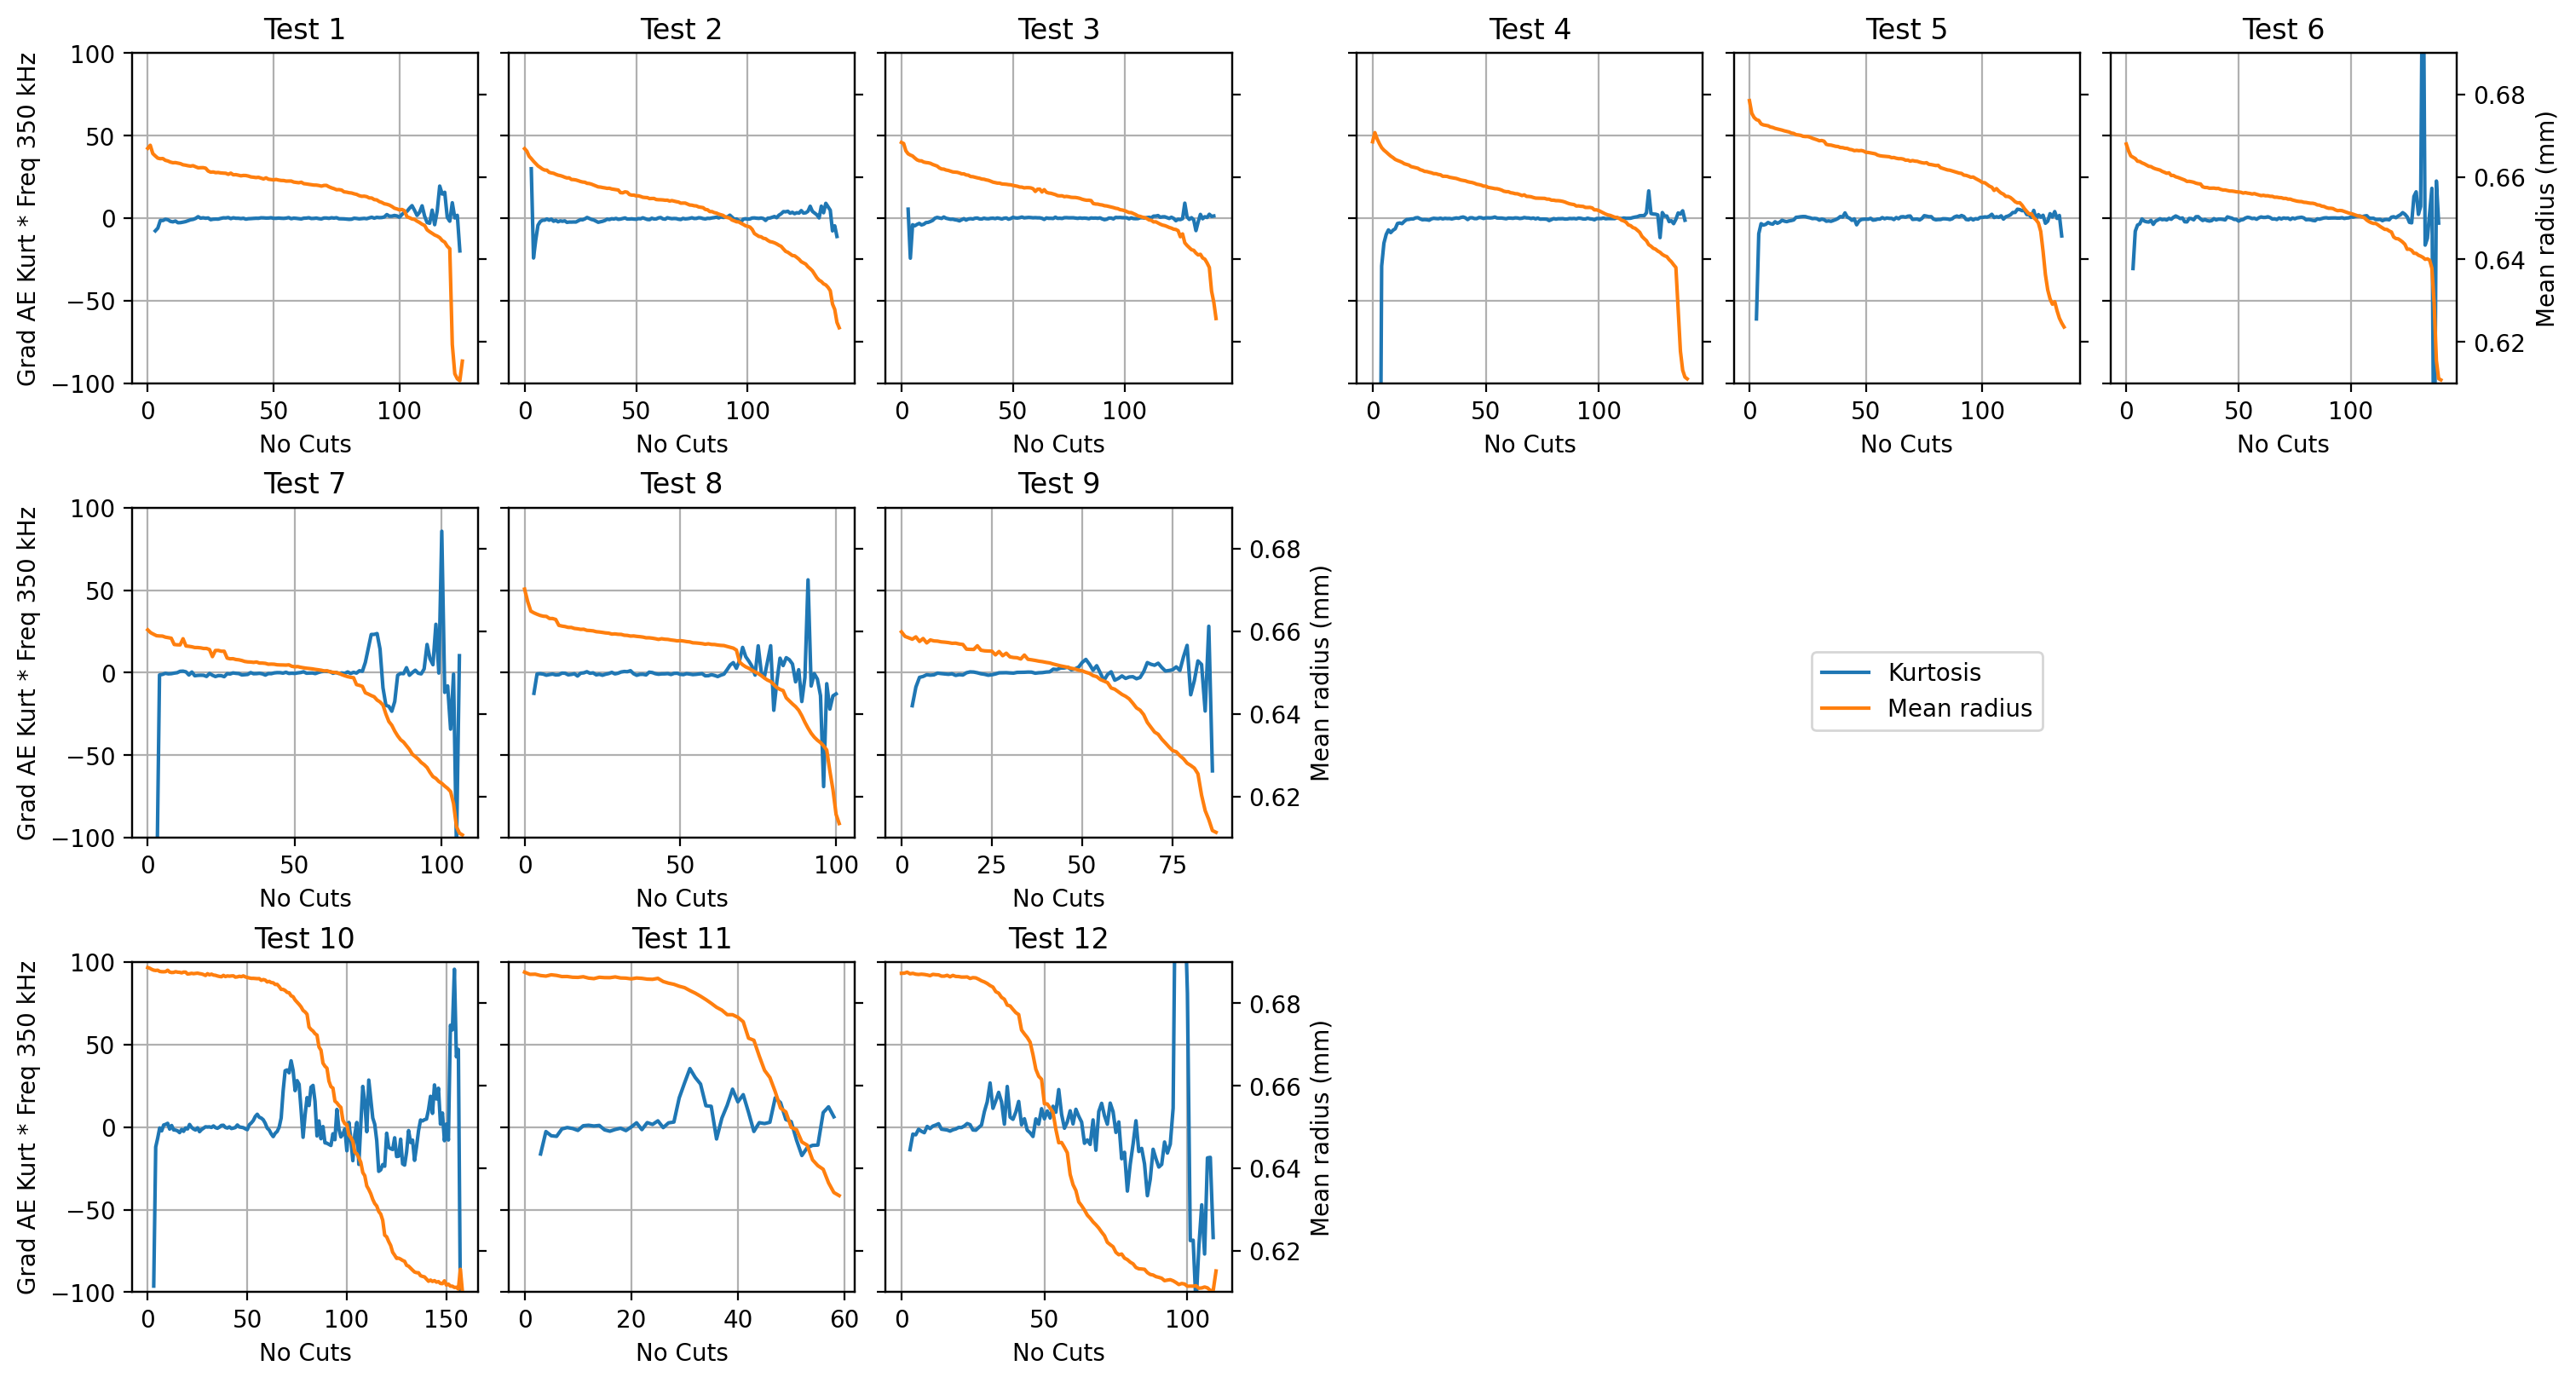

In [153]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey='row', constrained_layout=True, dpi=200)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y = _smooth(df['Kurtosis'][:] * df['Freq 350 kHz'][:], 5)
    # y = _smooth(y, 3)
    gradient = np.abs(y)
    gradient = np.diff(gradient, 1)

    # threshold = 5
    # ax[ax_row, ax_col].axhline(threshold, color='r', ls='--', alpha=0.5)
    # ax[ax_row, ax_col].axhline(-threshold, color='r', ls='--', alpha=0.5)

    ax[ax_row, ax_col].plot(gradient, label='Kurtosis')

    # # crossing index where gradient is positive
    # idx = np.where(np.diff(np.sign(np.abs(gradient) - threshold)))[0]
    # idx = idx[idx > 10]
    # cutoffs.append(idx[0])

    # ax[ax_row, ax_col].axvline(idx[0], color='r', ls='--', alpha=0.5)
    # ax[ax_row, ax_col].text(idx[0] + 1, 50, f'Cut {idx[0]}', color='r', fontsize=9, rotation=90)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Mean radius'], 'C1', label='Mean radius')
    ax_twin[ax_row, ax_col].set_ylim(0.61, 0.69)


    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    ax[ax_row, ax_col].set_ylim(-100, 100)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Grad AE Kurt * Freq 350 kHz')
    if i not in [5, 8, 11]:
        ax_twin[ax_row, ax_col].set(ylabel=None)
        ax_twin[ax_row, ax_col].set_yticklabels([])

ax_twin[0, 5].yaxis.set_tick_params(labelright=True)
ax_twin[0, 5].set_ylabel('Mean radius (mm)')
ax_twin[1, 2].yaxis.set_tick_params(labelright=True)
ax_twin[1, 2].set_ylabel('Mean radius (mm)')
ax_twin[2, 2].yaxis.set_tick_params(labelright=True)
ax_twin[2, 2].set_ylabel('Mean radius (mm)')


# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

l1, lab1 = ax[ax_row, ax_col].get_legend_handles_labels()
l2, lab2 = ax_twin[ax_row, ax_col].get_legend_handles_labels()
plt.figlegend(l1 + l2, lab1 + lab2,
              loc='center',
              bbox_to_anchor=(0.75, 0.5),
              ncol=1,
              )

## Mean FFT

In [26]:
def meanSquaredError(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred), axis=0)

def meanAbsoluteError(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred), axis=0)

In [27]:
FFT_RES = 1000
INPUT_I = 10
ERROR_FUNC = meanAbsoluteError

In [28]:
def raw_fft_scores(ix, exps, fft_res, input_i, error_func):

    # Check if exp has fft data
    ffts = pd.DataFrame(exps[ix].ae.fft[1000])

    # ref_fft is all but this test fft
    # ref_fft = [pd.DataFrame(e.ae.fft[1000][5:wear_out_idx[ix]]) for i, e in enumerate(exps) if i != ix]
    # ref_fft = pd.concat(ref_fft)
    # mean_fft = np.mean(ref_fft, axis=0)

    # mean_fft = np.tile(mean_fft, (ffts.shape[0], 1))
    # mfft_scores = error_func(mean_fft.T, ffts.T)
    ffts = ffts.values[:, 5:10]
    mean_fft = np.mean(ffts[:10, :], axis=0)
    mean_fft = np.tile(mean_fft, (ffts.shape[0], 1))
    mfft_scores = error_func(mean_fft.T, ffts.T)
    return mfft_scores

raw_fft_sc= []

for ix, e in enumerate(exps):
    raw_fft_sc.append(raw_fft_scores(ix,
                                     exps,
                                     FFT_RES,
                                     INPUT_I,
                                     ERROR_FUNC))

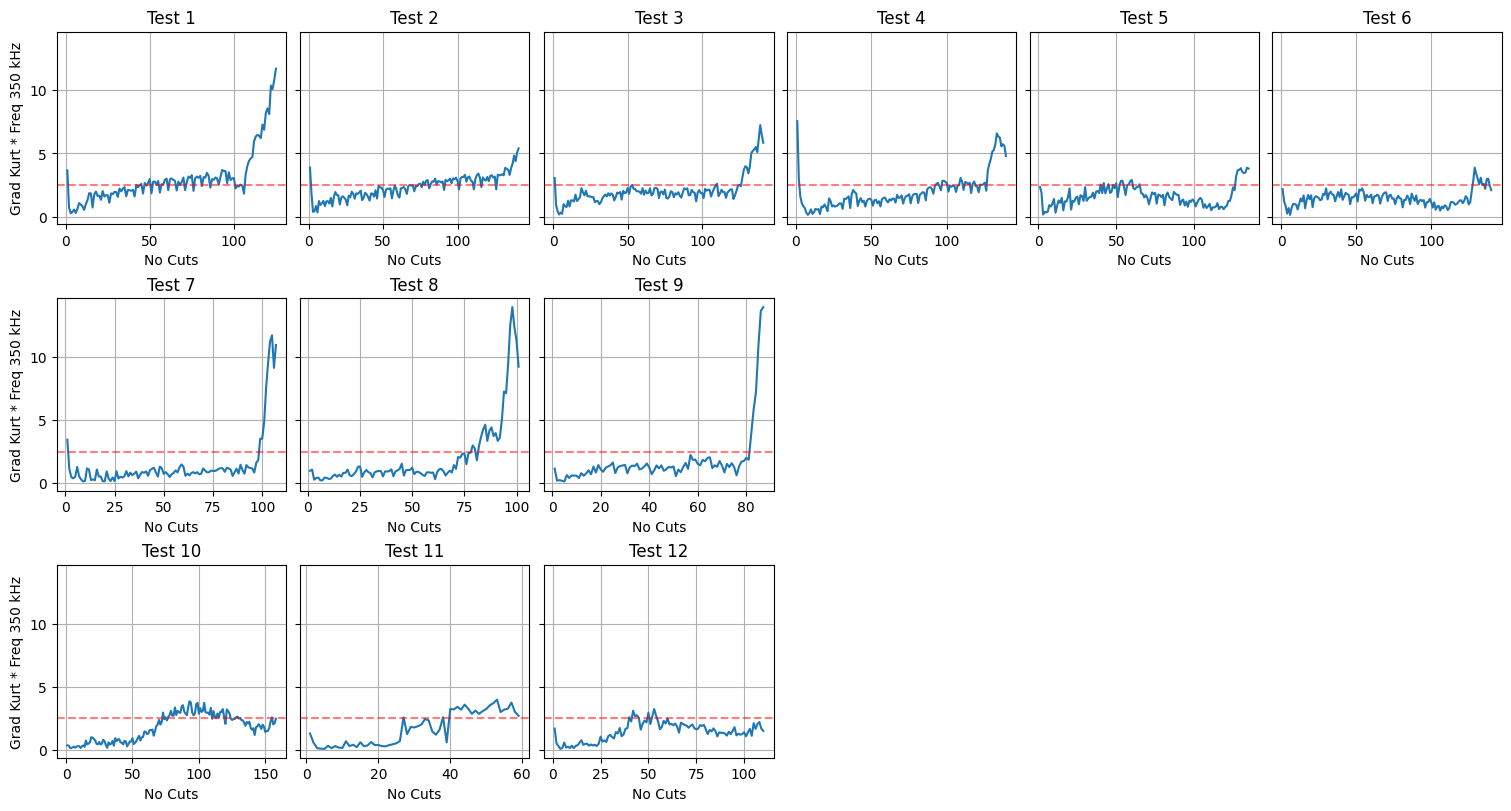

In [29]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey=True, constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y =  raw_fft_sc[i]
    # y = _smooth(y, 3)

    ax[ax_row, ax_col].plot(x, y)

    ax[ax_row, ax_col].axhline(2.5, color='r', ls='--', alpha=0.5)

    # ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    # ax_twin[ax_row, ax_col].plot(df['Runout'], 'C1', label='Runout')
    # ax_twin[ax_row, ax_col].set_ylim(0, 80)


    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    # ax[ax_row, ax_col].set_ylim(0, 250)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('Grad Kurt * Freq 350 kHz')

# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

## Frequency Analysis 

In [30]:
def calc_mean_freq(spectrum):
    Ck = np.cumsum(spectrum)
    Chalf = Ck[-1] / 2
    mean_ix = np.where(Ck > Chalf)[0][0]
    mean_freq = mean_ix * (fs / 2) / len(spectrum)
    return mean_freq

In [31]:
def calc_peak_freq(spectrum):
    peak_ix = np.where(spectrum == np.max(spectrum))[0][0]
    peak_freq = peak_ix * (fs / 2) / len(spectrum)
    return peak_freq

In [32]:
def calc_freq_kurt(spectrum):
    kurt_freq = stats.kurtosis(spectrum)
    return kurt_freq

In [33]:
def calc_freq_skew(spectrum):
    skew_freq = stats.skew(spectrum)
    return skew_freq

In [34]:
def calc_freq_variance(spectrum):
    var_freq = np.var(spectrum)
    return var_freq

In [35]:
freq_kurt = []
freq_skew = []
freq_mean = []
freq_var = []
for i, e in enumerate(exps):
    ffts = e.ae.fft[1000]
    freq_kurt.append(np.array([calc_freq_kurt(s) for s in ffts]))
    freq_skew.append(np.array([calc_freq_skew(s) for s in ffts]))
    freq_mean.append(np.array([calc_mean_freq(s) for s in ffts]))
    freq_var.append(np.array([calc_freq_variance(s) for s in ffts]))

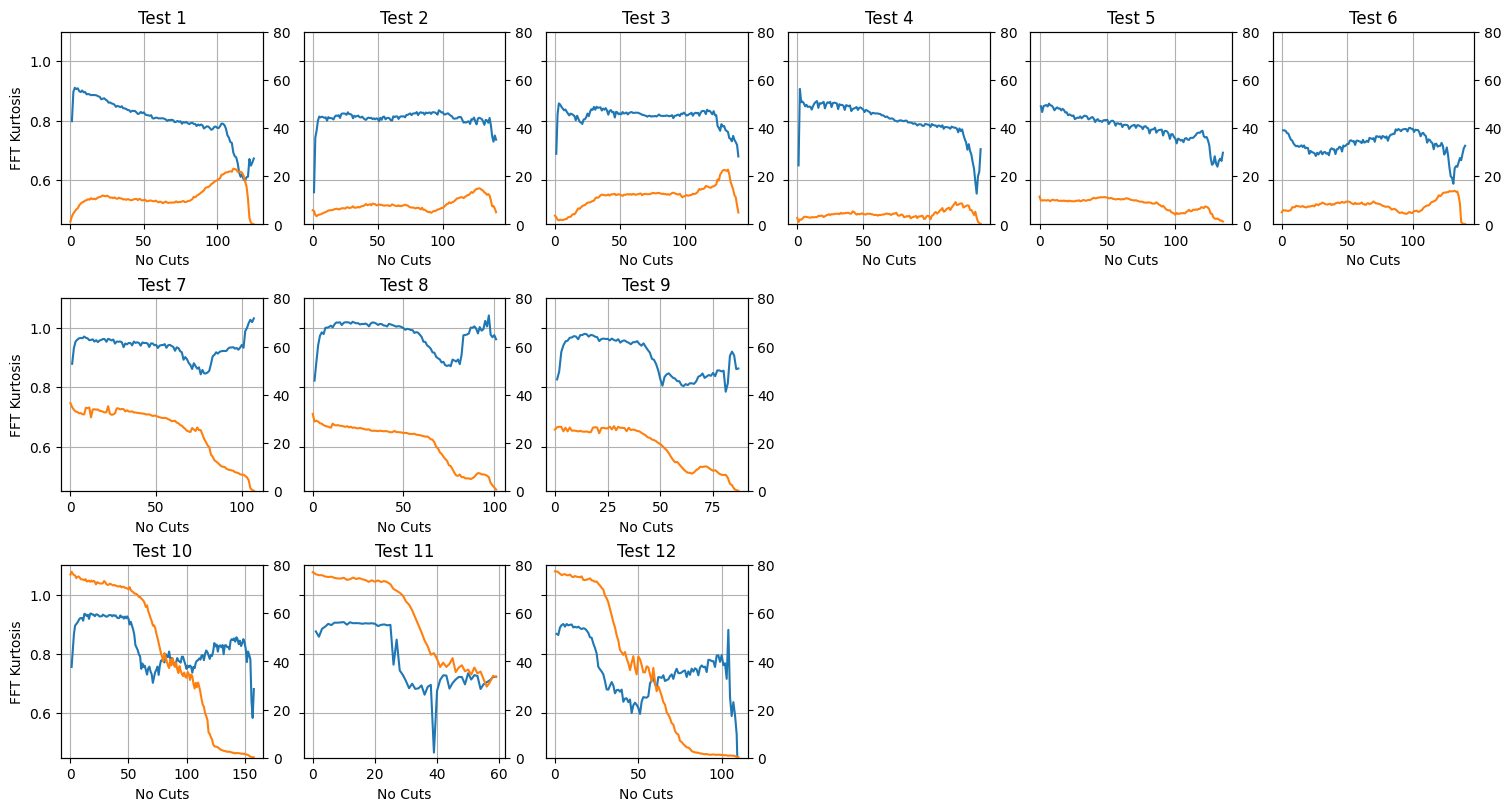

In [36]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey=True, constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y = np.abs(freq_kurt[i])
    # y = np.diff(y, 1)
    # y = _smooth(y, 3)

    ax[ax_row, ax_col].plot(x, y)

    # ax[ax_row, ax_col].axhline(0.2, color='r', ls='--', alpha=0.5)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Runout'], 'C1', label='Form error')
    ax_twin[ax_row, ax_col].set_ylim(0, 80)


    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    ax[ax_row, ax_col].set_ylim(0.45, 1.1)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('FFT Kurtosis')

# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')

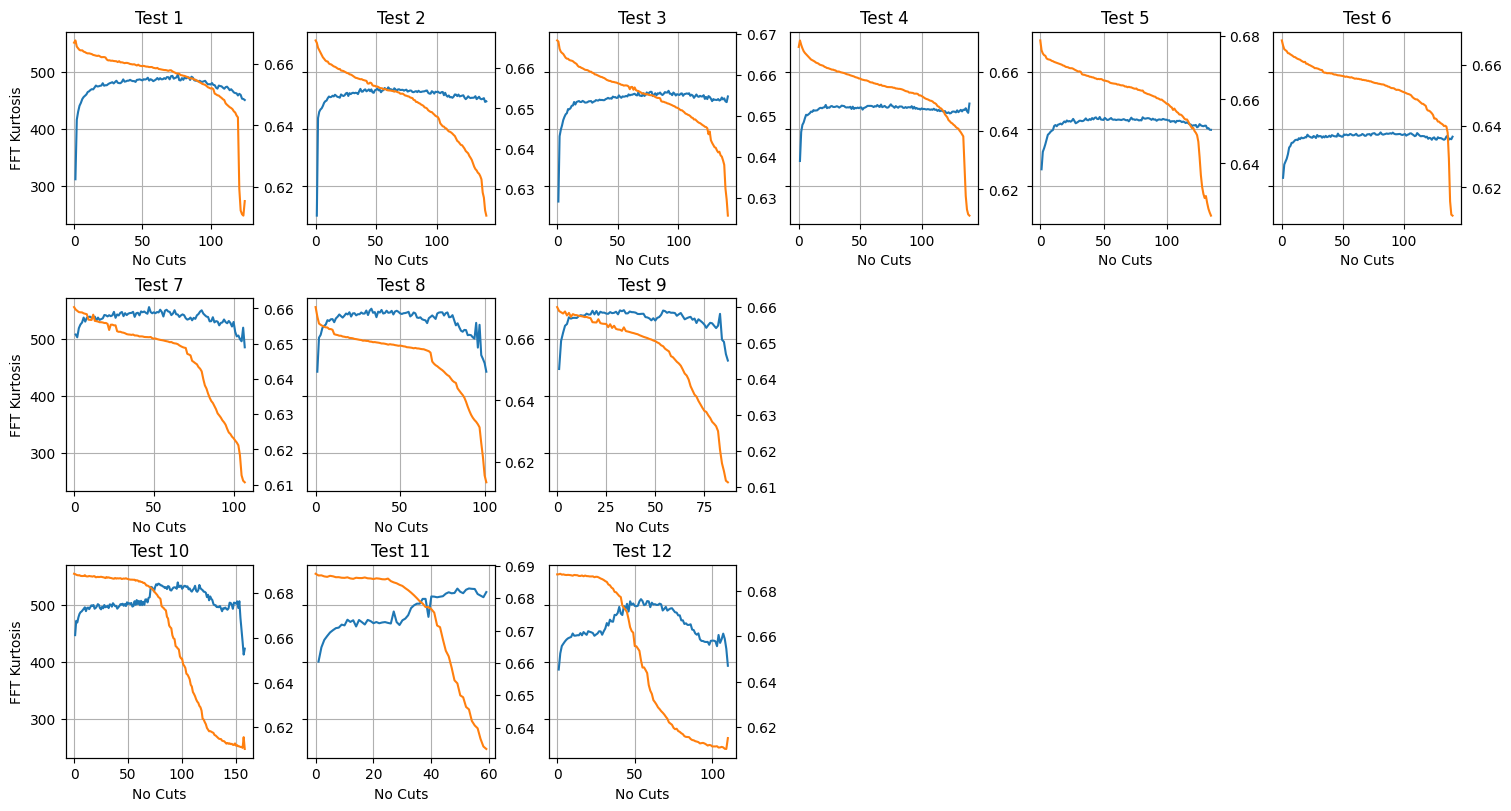

In [37]:
fig, ax = plt.subplots(3, 6, figsize=(15, 8), sharey=True, constrained_layout=True)
ax_twin = ax.copy()
ax_pos = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

cutoffs = []

for i, (df, ax_idx) in enumerate(zip(dfs, ax_pos)):
    ax_row, ax_col = ax_idx

    x =  np.arange(1, len(df))
    y = np.abs(pd.Series(freq_var[i]))
    # y = _smooth(y, 3)
    # y = np.diff(y, 1)

    ax[ax_row, ax_col].plot(x, y)

    # ax[ax_row, ax_col].axhline(np.median(freq_var[i][:15]), color='r', ls='--', alpha=0.5)

    ax_twin[ax_row, ax_col] = ax[ax_row, ax_col].twinx()
    ax_twin[ax_row, ax_col].plot(df['Mean radius'], 'C1', label='Form error')
    # ax_twin[ax_row, ax_col].set_ylim(0, 80)


    ax[ax_row, ax_col].set_title(f'Test {i + 1}')
    ax[ax_row, ax_col].set_xlabel('No Cuts')

    # ax[ax_row, ax_col].set_ylim(-50, 50)

    ax[ax_row, ax_col].set_axisbelow(True)
    ax[ax_row, ax_col].grid(True)

    if ax_col == 0:
        ax[ax_row, ax_col].set_ylabel('FFT Kurtosis')

# remove unused axes
for i in range(1, 3):
    for j in range(3, 6):
        if i == 0 and j == 0:
            continue
        ax[i, j].axis('off')